In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cause_of_deaths_updates.csv to cause_of_deaths_updates.csv


In [ ]:
#importing necassary libraries

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
import pandas as pd
from plotly.subplots import make_subplots
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import shapiro
import warnings

In [ ]:
#redaing the dataset from csv files

df = pd.read_csv("cause_of_deaths_updates.csv")
df.head()

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,2108,3709,338,2054,4154,5945,2673,5005,323,2985
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,2120,3724,351,2119,4472,6050,2728,5120,332,3092
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,2153,3776,386,2404,5106,6223,2830,5335,360,3325
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,2195,3862,425,2797,5681,6445,2943,5568,396,3601
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,2231,3932,451,3038,6001,6664,3027,5739,420,3816


In [ ]:
# dataset information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6120 entries, 0 to 6119
Data columns (total 34 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Country/Territory                           6120 non-null   object
 1   Code                                        6120 non-null   object
 2   Year                                        6120 non-null   int64 
 3   Meningitis                                  6120 non-null   int64 
 4   Alzheimer's Disease and Other Dementias     6120 non-null   int64 
 5   Parkinson's Disease                         6120 non-null   int64 
 6   Nutritional Deficiencies                    6120 non-null   int64 
 7   Malaria                                     6120 non-null   int64 
 8   Drowning                                    6120 non-null   int64 
 9   Interpersonal Violence                      6120 non-null   int64 
 10  Maternal Disorders      

In [ ]:
# calculating the information for null values

df.isnull().sum()

Country/Territory                             0
Code                                          0
Year                                          0
Meningitis                                    0
Alzheimer's Disease and Other Dementias       0
Parkinson's Disease                           0
Nutritional Deficiencies                      0
Malaria                                       0
Drowning                                      0
Interpersonal Violence                        0
Maternal Disorders                            0
HIV/AIDS                                      0
Drug Use Disorders                            0
Tuberculosis                                  0
Cardiovascular Diseases                       0
Lower Respiratory Infections                  0
Neonatal Disorders                            0
Alcohol Use Disorders                         0
Self-harm                                     0
Exposure to Forces of Nature                  0
Diarrheal Diseases                      

In [ ]:
#shape of dataset

df.shape

(6120, 34)

In [ ]:
#datatype of attributes
#Check for data type

df.dtypes

Country/Territory                             object
Code                                          object
Year                                           int64
Meningitis                                     int64
Alzheimer's Disease and Other Dementias        int64
Parkinson's Disease                            int64
Nutritional Deficiencies                       int64
Malaria                                        int64
Drowning                                       int64
Interpersonal Violence                         int64
Maternal Disorders                             int64
HIV/AIDS                                       int64
Drug Use Disorders                             int64
Tuberculosis                                   int64
Cardiovascular Diseases                        int64
Lower Respiratory Infections                   int64
Neonatal Disorders                             int64
Alcohol Use Disorders                          int64
Self-harm                                     

In [ ]:
#Rename column

df=df.rename(columns={'Country/Territory':'Country'})

df.head()

,Country,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,2108,3709,338,2054,4154,5945,2673,5005,323,2985
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,2120,3724,351,2119,4472,6050,2728,5120,332,3092
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,2153,3776,386,2404,5106,6223,2830,5335,360,3325
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,2195,3862,425,2797,5681,6445,2943,5568,396,3601
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,2231,3932,451,3038,6001,6664,3027,5739,420,3816


In [ ]:
#Does the data have duplicate lines?

have_duplicate_rows = df.duplicated().any()
have_duplicate_rows

False

In [ ]:
# skewness along the index axis
df.skew(axis = 0, skipna = True)

<ipython-input-10-135d763750d0>:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew(axis = 0, skipna = True)


Year                                           0.000000
Meningitis                                     8.248599
Alzheimer's Disease and Other Dementias        8.695288
Parkinson's Disease                            9.321242
Nutritional Deficiencies                      14.863496
Malaria                                        9.159105
Drowning                                      10.553901
Interpersonal Violence                         5.777146
Maternal Disorders                            12.278358
HIV/AIDS                                       6.610169
Drug Use Disorders                            13.367100
Tuberculosis                                  12.022406
Cardiovascular Diseases                        9.411914
Lower Respiratory Infections                   9.036604
Neonatal Disorders                            10.447536
Alcohol Use Disorders                          9.253511
Self-harm                                      8.973653
Exposure to Forces of Nature                  34

In [ ]:
print(f'There are  {len(df["Country"].unique())}  countries')

There are  204  countries


In [ ]:
#Create a new column for the total number of deaths (Sum all cause of deaths)

cause_of_deaths = [col for col in df.columns if col not in ('Country', 'Code', 'Year')]

df['Total_deaths'] = df[cause_of_deaths].sum(axis=1)

df.head()

,Country,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis,Total_deaths
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,3709,338,2054,4154,5945,2673,5005,323,2985,147971
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,3724,351,2119,4472,6050,2728,5120,332,3092,156844
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,3776,386,2404,5106,6223,2830,5335,360,3325,169156
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,3862,425,2797,5681,6445,2943,5568,396,3601,182230
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,3932,451,3038,6001,6664,3027,5739,420,3816,194795


In [ ]:
df.to_csv('disease_deaths.csv')


from google.colab import files
files.download('disease_deaths.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: >

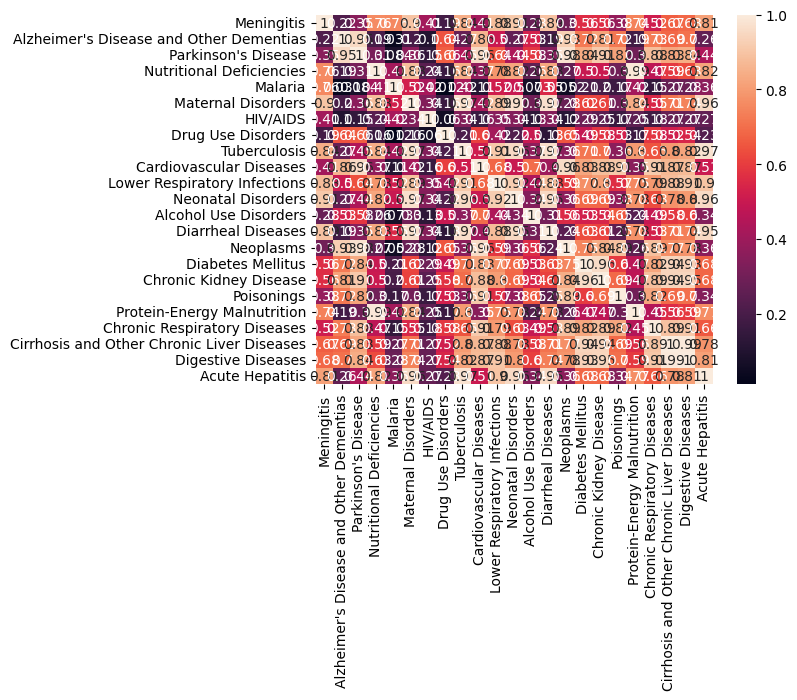

In [ ]:
sns.heatmap(
    df.loc[:, ['Meningitis',
       'Alzheimer\'s Disease and Other Dementias', 'Parkinson\'s Disease',
       'Nutritional Deficiencies', 'Malaria', 
        'Maternal Disorders', 'HIV/AIDS',
       'Drug Use Disorders', 'Tuberculosis', 'Cardiovascular Diseases',
       'Lower Respiratory Infections', 'Neonatal Disorders',
       'Alcohol Use Disorders',  
       'Diarrheal Diseases', 
       'Neoplasms', 'Diabetes Mellitus',
       'Chronic Kidney Disease', 'Poisonings', 'Protein-Energy Malnutrition',
        'Chronic Respiratory Diseases',
       'Cirrhosis and Other Chronic Liver Diseases', 'Digestive Diseases',
        'Acute Hepatitis']].corr(),
    annot=True
)


In [ ]:
#Find the total number of each disease and rename columns for the chart

disease_df = df[cause_of_deaths].sum().to_frame().reset_index()
disease_df.rename(columns={"index": "Disease", 0:"Total cases"}, inplace=True)
disease_df

,Disease,Total cases
0,Meningitis,10524572
1,Alzheimer's Disease and Other Dementias,29768839
2,Parkinson's Disease,7179795
3,Nutritional Deficiencies,13792032
4,Malaria,25342676
5,Drowning,10301999
6,Interpersonal Violence,12752839
7,Maternal Disorders,7727046
8,HIV/AIDS,36364419
9,Drug Use Disorders,2656121


In [ ]:
fig = px.sunburst(disease_df, 
                  path=['Disease'], 
                  values='Total cases')
fig.update_traces(textinfo='label+percent parent')    
fig.update_layout(title_text='Percentage of Cause of Deaths', title_x=0.5, font_size=15)
fig.show()

In [ ]:
#Another Visualisation by Treemap

fig = px.treemap(disease_df, 
                 path = [px.Constant('Total cases'), 'Disease'], 
                 values = 'Total cases' )
fig.update_traces(textinfo='label+percent parent')    
fig.update_layout(title_text='Percentage of Cause of Deaths', title_x=0.5, font_size=15)
fig.show()

In [ ]:
# Total Number of Deaths Around the World

country_df = df.groupby('Country')['Total_deaths'].sum().sort_values(ascending=False).reset_index()
country_df

,Country,Total_deaths
0,China,265408106
1,India,238158165
2,United States,71197802
3,Russia,59591155
4,Indonesia,44046941
...,...,...
199,Cook Islands,3999
200,Tuvalu,2962
201,Nauru,2249
202,Niue,591


In [ ]:
fig = px.sunburst(country_df, 
                  path=['Country'], 
                  values='Total_deaths')
fig.update_traces(textinfo='label+percent parent')    
fig.update_layout(title_text='Percentage of Total Number of Deaths Around the World', title_x=0.5, font_size=15)
fig.show()

In [ ]:
#Another Visualisation by Treemap

fig = px.treemap(country_df, 
                 path = [px.Constant('Total_deaths'), 'Country'], 
                 values = 'Total_deaths')               
fig.update_traces(textinfo='label+percent parent')    
fig.update_layout(title_text='Percentage of Total Number of Deaths Around the World', title_x=0.5, font_size=15)
fig.show()

In [ ]:
#Another visualisation by Choropleth Map

fig = px.choropleth(country_df,
                    locations='Country', 
                    locationmode= 'country names', 
                    color= 'Total_deaths', 
                    range_color=[1,10000000], 
                    hover_name='Country')

fig.update_layout(title={'text' : 'Total Number of Deaths around the world'}, title_x=0.5, font_size=15)
fig.show()

Number of Deaths in China

In [ ]:
cause = ['Meningitis',
       'Alzheimer\'s Disease and Other Dementias', 'Parkinson\'s Disease',
       'Nutritional Deficiencies', 'Malaria', 'Drowning',
       'Interpersonal Violence', 'Maternal Disorders', 'HIV/AIDS',
       'Drug Use Disorders', 'Tuberculosis', 'Cardiovascular Diseases',
       'Lower Respiratory Infections', 'Neonatal Disorders',
       'Alcohol Use Disorders', 'Self-harm', 'Exposure to Forces of Nature',
       'Diarrheal Diseases', 'Environmental Heat and Cold Exposure',
       'Neoplasms', 'Conflict and Terrorism', 'Diabetes Mellitus',
       'Chronic Kidney Disease', 'Poisonings', 'Protein-Energy Malnutrition',
       'Road Injuries', 'Chronic Respiratory Diseases',
       'Cirrhosis and Other Chronic Liver Diseases', 'Digestive Diseases',
       'Fire, Heat, and Hot Substances', 'Acute Hepatitis']

In [ ]:
df['No. of Deaths'] = df[cause].sum(axis=1)

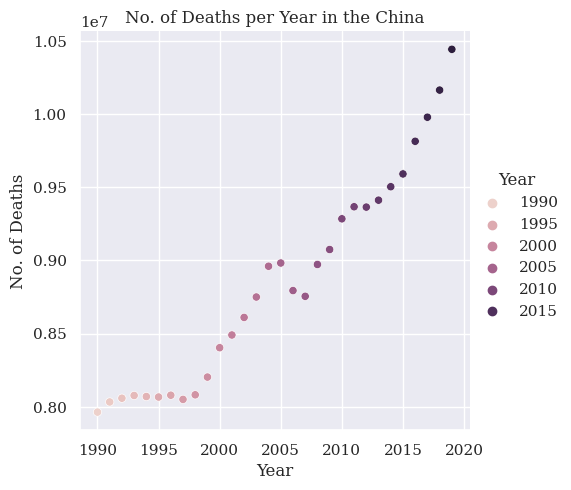

In [ ]:
No_of_Deaths_china = df[df['Country']=='China'].sort_values(by='No. of Deaths',ascending=False)
sns.set(style='darkgrid', font='serif')
sns.relplot(data=No_of_Deaths_china, x='Year', y='No. of Deaths', hue='Year')
plt.xlabel("Year")
plt.ylabel("No. of Deaths")
plt.title("No. of Deaths per Year in the China")
plt.show()

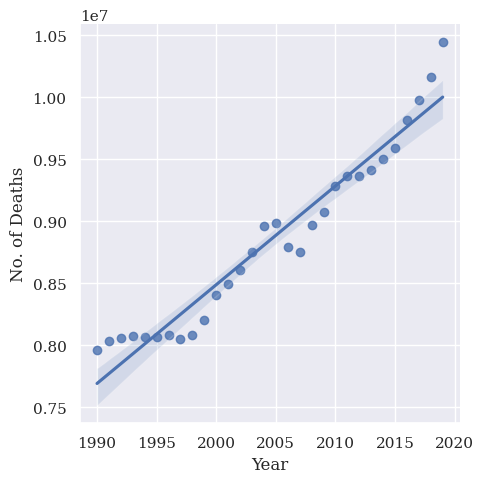

In [ ]:
sns.lmplot(x='Year', y='No. of Deaths', data=No_of_Deaths_china)
print()

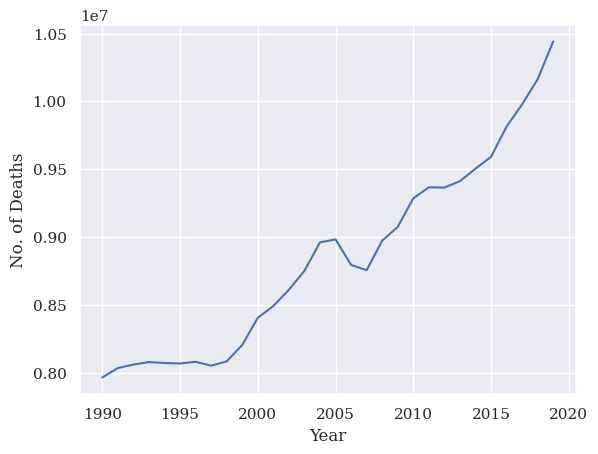

In [ ]:
sns.lineplot(x='Year', y='No. of Deaths', data=No_of_Deaths_china)
print()

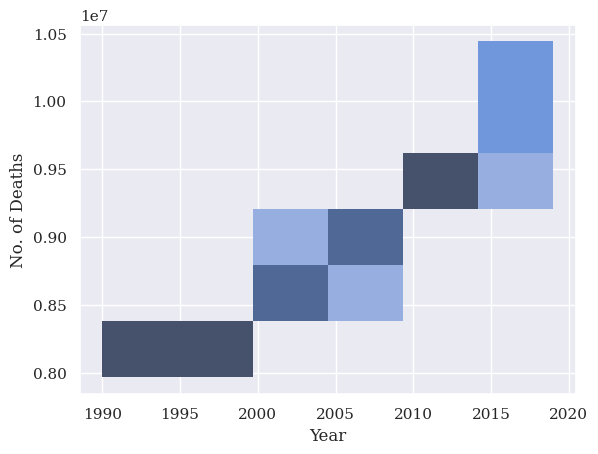

In [ ]:
sns.histplot(x='Year', y='No. of Deaths', data=No_of_Deaths_china)
print()

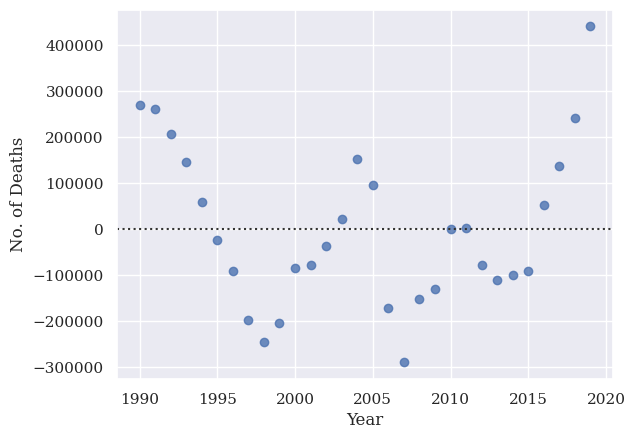

In [ ]:

sns.residplot(x='Year', y='No. of Deaths', data=No_of_Deaths_china)
print()

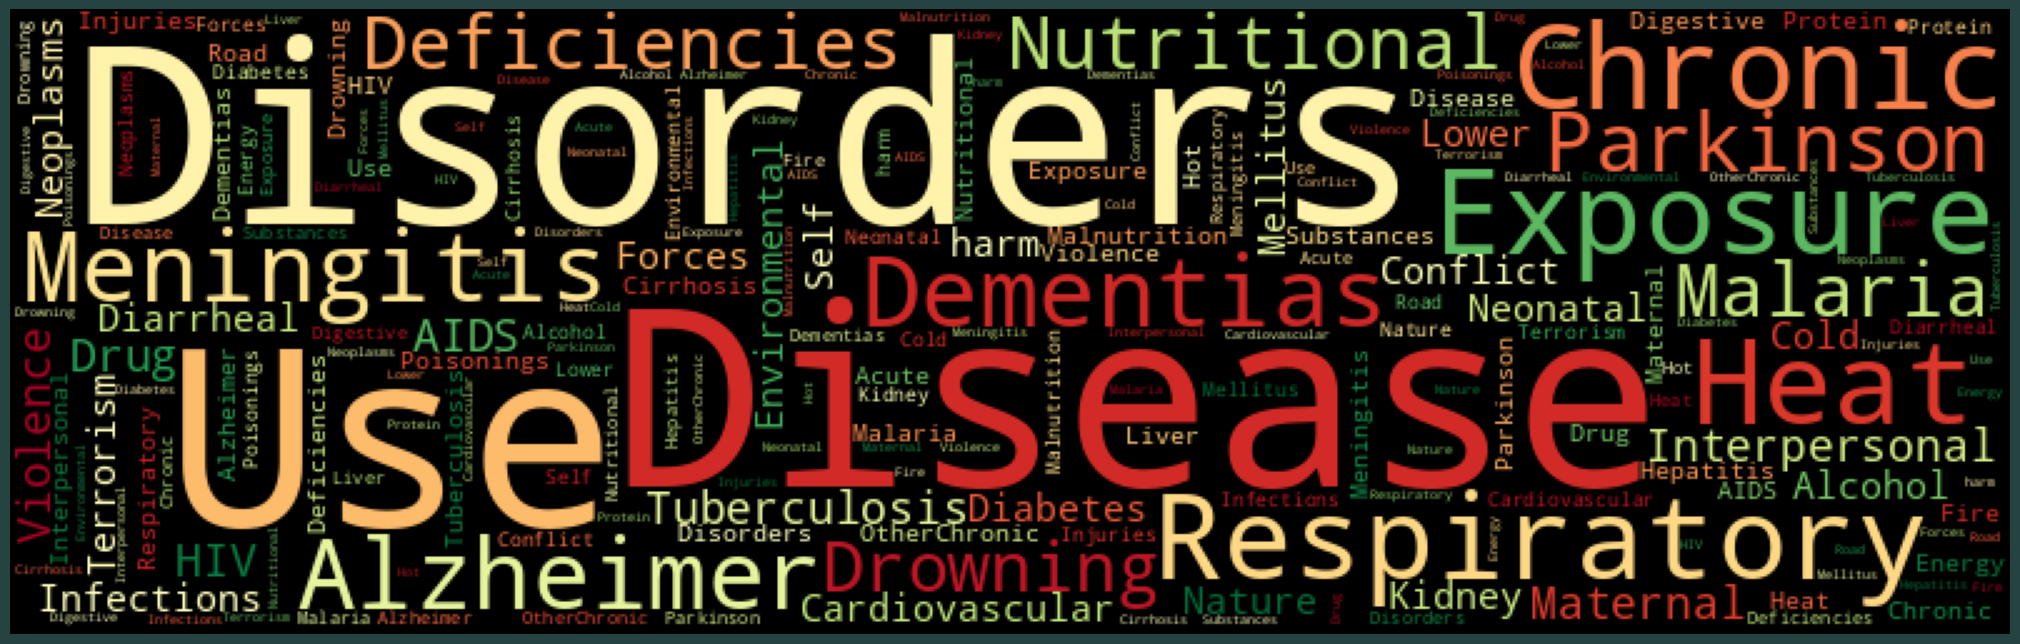

In [ ]:
# wordcloud for casue of deaths
from wordcloud import WordCloud

text= "Meningitis Alzheimer's Disease and Other Dementias Parkinson's Disease Nutritional Deficiencies Malaria Drowning Interpersonal Violence Maternal Disorders HIV/AIDS Drug Use Disorders Tuberculosis Cardiovascular Diseases Lower Respiratory Infections Neonatal Disorders Alcohol Use  Disorders Self-harm Exposure to Forces of Nature Diarrheal Diseases Environmental Heat and Cold Exposure Neoplasms Conflict and Terrorism Diabetes Mellitus Chronic Kidney Disease Poisonings Protein-Energy Malnutrition Road Injuries Chronic Respiratory Diseases Cirrhosis and OtherChronic Liver Diseases Digestive Diseases Fire Heat and Hot Substances Acute Hepatitis"

wordcloud = WordCloud(width = 800, height = 250, 
            background_color ="black",colormap="RdYlGn",max_font_size=100, stopwords =None,repeat= True).generate(text)
plt.figure(figsize = (20, 8),facecolor= "#254441") 
plt.imshow(wordcloud)
plt.axis("off")
plt.margins(x=0, y=0)
plt.tight_layout(pad = 0) 
plt.show()

In [ ]:
communicable_diseases_df = df[["Year", "Nutritional Deficiencies", "Malaria", "Maternal Disorders", "HIV/AIDS","Drug Use Disorders","Tuberculosis","Neonatal Disorders","Alcohol Use Disorders","Diarrheal Diseases"]]

non_communicable_diseases_df = df[["Year", "Meningitis","Alzheimer's Disease and Other Dementias", "Parkinson's Disease", 
"Cardiovascular Diseases","Lower Respiratory Infections", "Acute Hepatitis", "Digestive Diseases", "Cirrhosis and Other Chronic Liver Diseases", 
"Chronic Respiratory Diseases", "Diabetes Mellitus","Chronic Kidney Disease"]]

injures_df = df[["Year","Drowning", "Interpersonal Violence", "Fire, Heat, and Hot Substances", "Road Injuries", "Poisonings" ,
"Protein-Energy Malnutrition", "Conflict and Terrorism", "Self-harm", "Exposure to Forces of Nature", 
"Environmental Heat and Cold Exposure"]]

communicable_diseases_df = df.assign(sumRow = communicable_diseases_df.sum(axis=1) - communicable_diseases_df['Year']) 
sum_by_year_communicable_diseases_df = communicable_diseases_df[['Year','sumRow']].groupby('Year').sum().reset_index(drop=False)

non_communicable_diseases_df = non_communicable_diseases_df.assign(sumRow = non_communicable_diseases_df.sum(axis=1) - non_communicable_diseases_df['Year'])
sum_by_year_non_communicable_diseases_df = non_communicable_diseases_df[['Year','sumRow']].groupby('Year').sum().reset_index(drop=False)

injures_df = injures_df.assign(sumRow = injures_df.sum(axis=1) - injures_df['Year']) 
sum_by_year_injures_df = injures_df[['Year','sumRow']].groupby('Year').sum().reset_index(drop=False)

sum_by_year_df = sum_by_year_communicable_diseases_df.merge(sum_by_year_non_communicable_diseases_df, on='Year').merge(sum_by_year_injures_df,on='Year')
sum_by_year_df.rename(columns={'sumRow_x': 'communicable_diseases', 'sumRow_y': 'non_communicable_diseases', 'sumRow': 'injures'}, inplace=True)

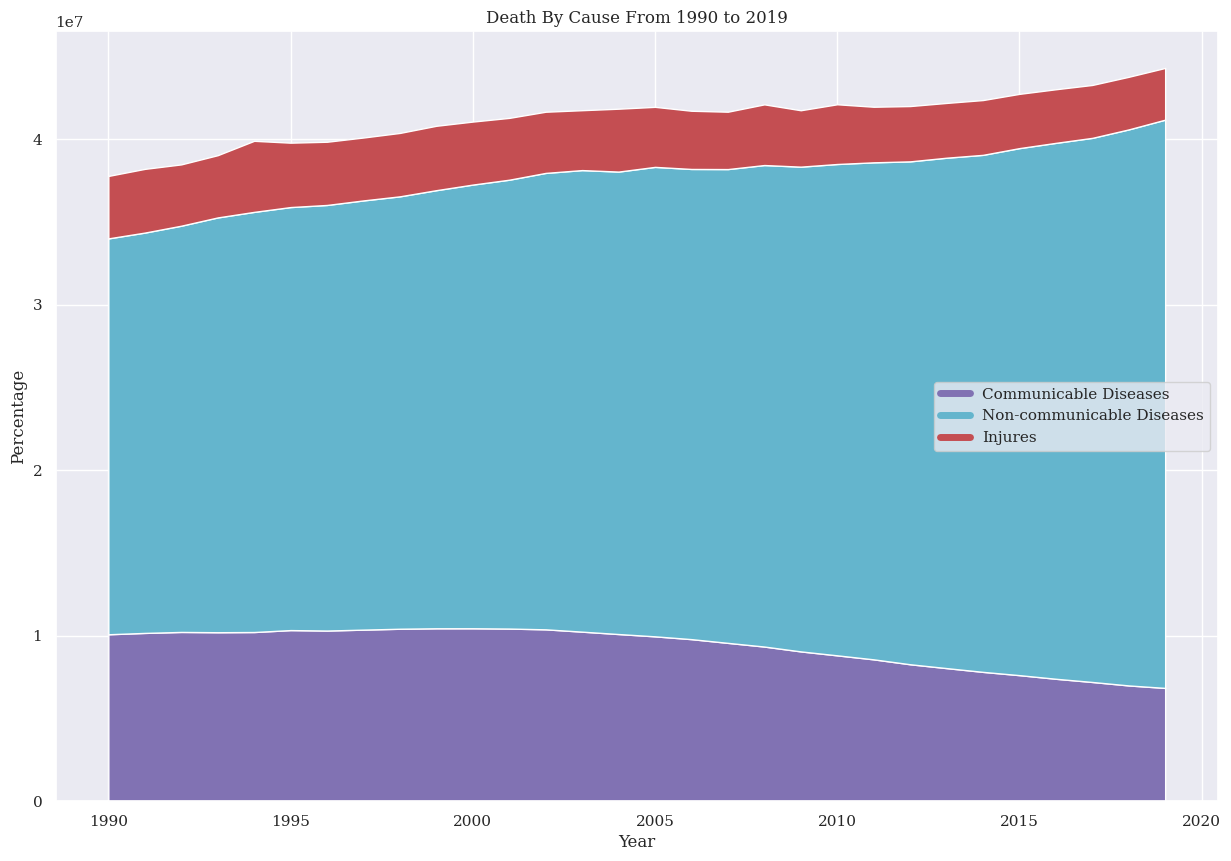

In [ ]:
sum_by_year_copy=sum_by_year_df.copy()
total_sum_by_year = sum_by_year_copy.sum(axis = 1) - sum_by_year_copy['Year']
sum_by_year_copy['communicable_diseases'] = (sum_by_year_copy['communicable_diseases']*100/total_sum_by_year).round(2)
sum_by_year_copy['non_communicable_diseases'] = (sum_by_year_copy['non_communicable_diseases']*100/total_sum_by_year).round(2)
sum_by_year_copy['injures'] = 100 - sum_by_year_copy['communicable_diseases'] - sum_by_year_copy['non_communicable_diseases']

plt.rcParams['figure.figsize'] = [15, 10]
 
# Stackplot

plt.plot([],[],color='m', label='Communicable Diseases', linewidth=5)
plt.plot([],[],color='c', label='Non-communicable Diseases', linewidth=5)
plt.plot([],[],color='r', label='Injures', linewidth=5)

plt.stackplot(sum_by_year_df['Year'],
                sum_by_year_df['communicable_diseases'], 
              sum_by_year_df['non_communicable_diseases'], 
              sum_by_year_df['injures'], 
             colors=['m','c','r'])
 
plt.xlabel('Year')
 
plt.ylabel('Percentage')
 
# Title of Graph
plt.title('Death By Cause From 1990 to 2019')
plt.legend(loc='center right')
# Displaying Graph
plt.show()

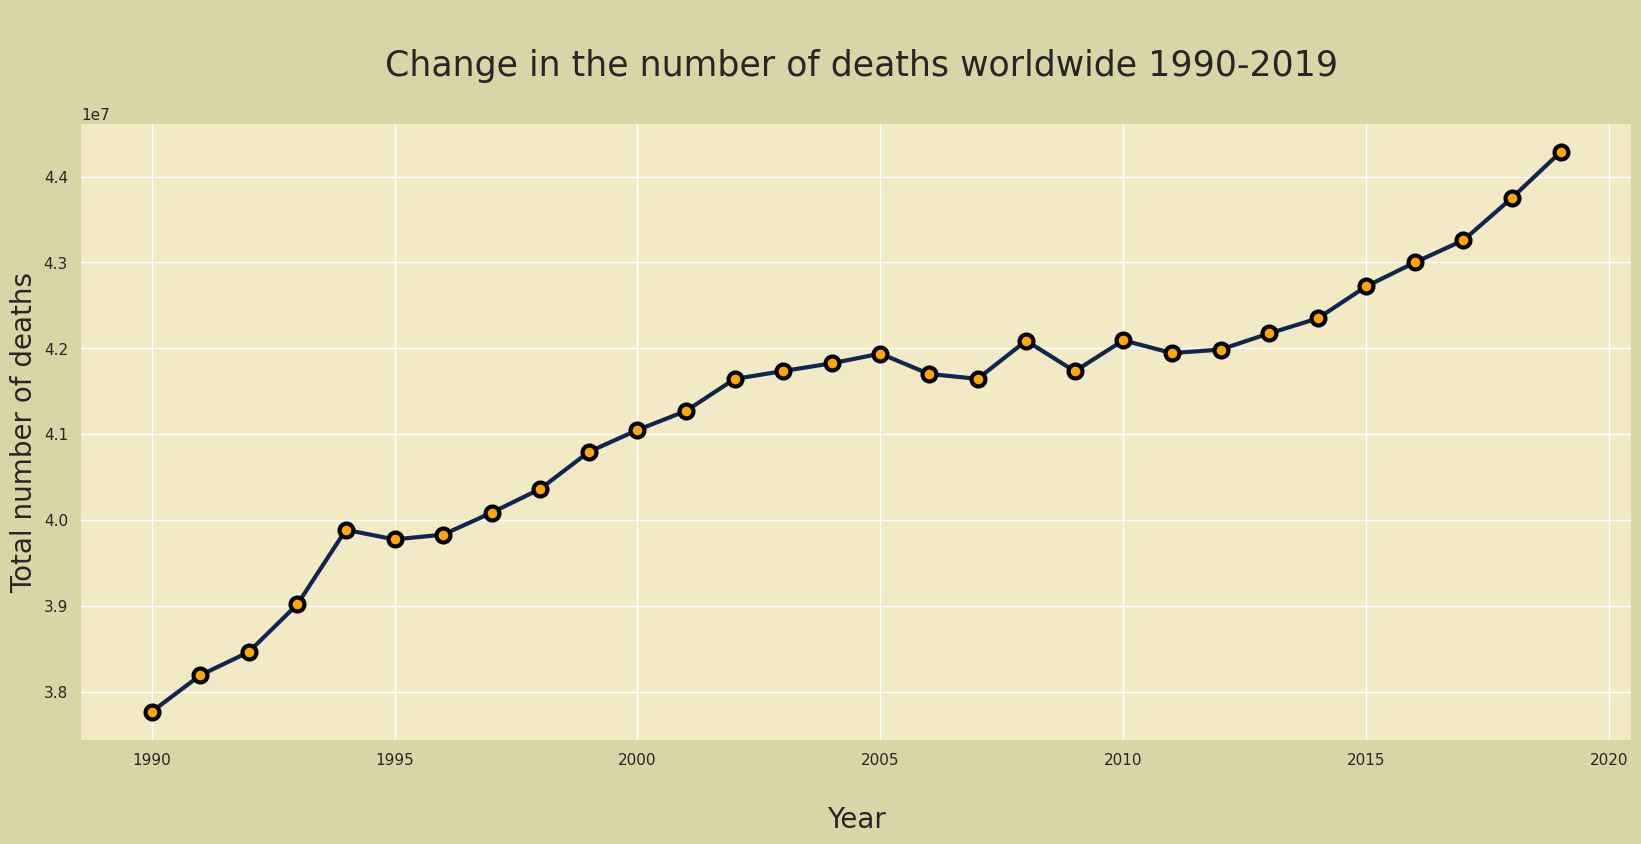

In [ ]:
sum_by_year_df["Total"]=sum_by_year_df["communicable_diseases"]+sum_by_year_df["non_communicable_diseases"]+sum_by_year_df["injures"]

sns.set(rc={"axes.facecolor":"#F2EAC5","figure.facecolor":"#D8D5A6"})
plt.subplots(figsize=(20,8))

p=sns.lineplot(x=sum_by_year_df["Year"] ,y=sum_by_year_df["Total"],data=sum_by_year_df,color="#11264e",marker="o",linewidth=3,markersize=10,markerfacecolor="orange",markeredgecolor="black",markeredgewidth=3)
p.axes.set_title("\n Change in the number of deaths worldwide 1990-2019\n",fontsize=25)
p.axes.set_xlabel("\nYear",fontsize=20)
p.axes.set_ylabel("Total number of deaths",fontsize=20)

sns.despine(left=True, bottom=True)
plt.show()

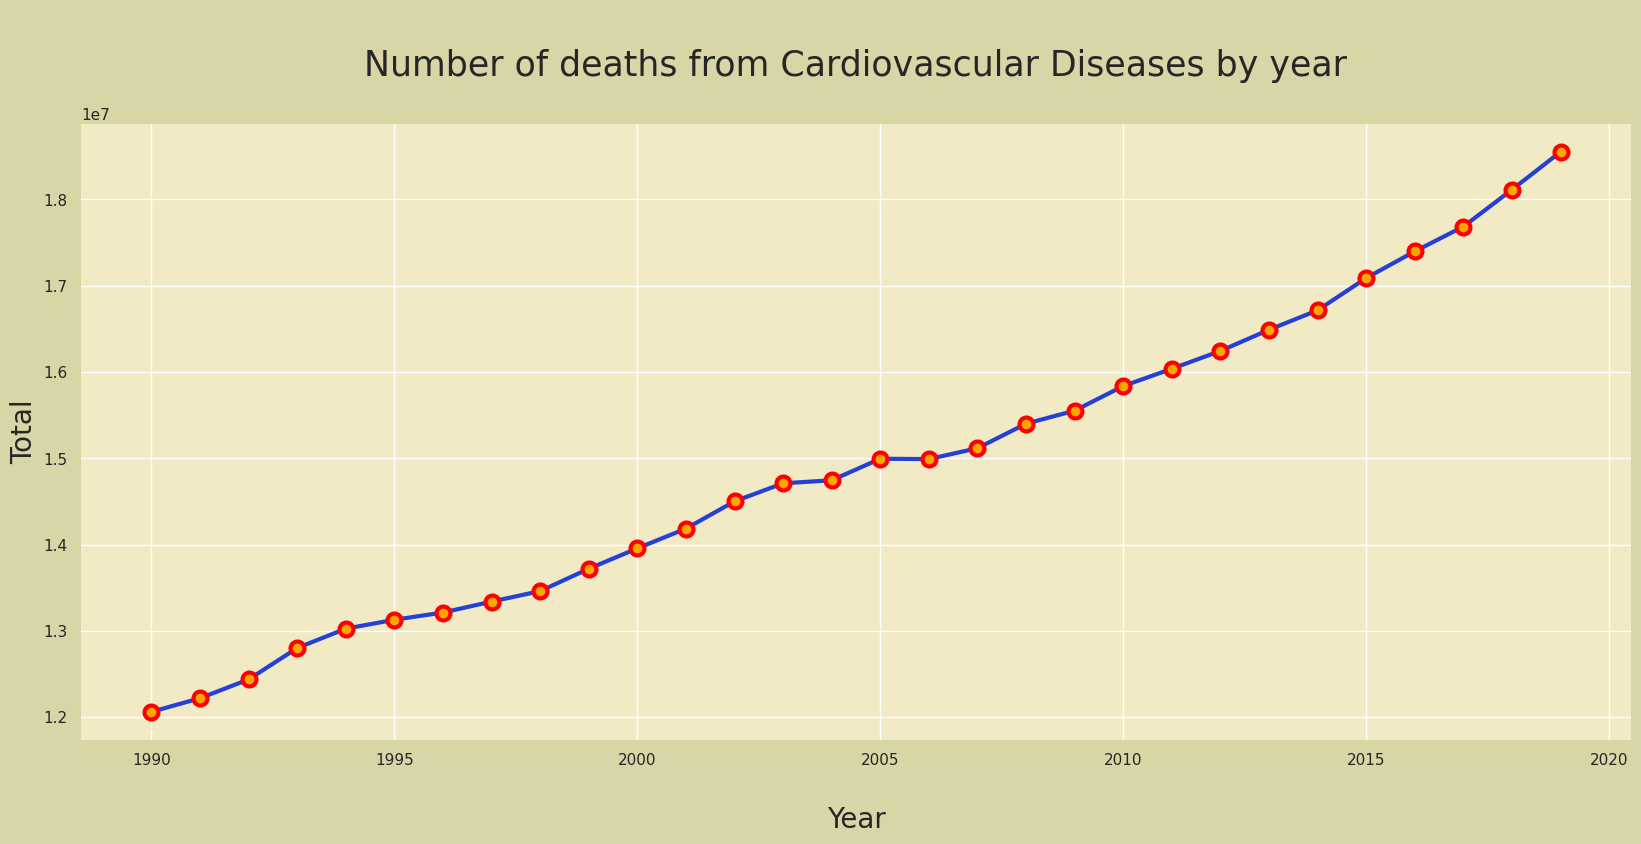

In [ ]:
Cardiovascular_Diseases=pd.DataFrame(df.groupby("Year")["Cardiovascular Diseases"].sum()).reset_index()
sns.set(rc={"axes.facecolor":"#F2EAC5","figure.facecolor":"#D8D5A6"})
plt.subplots(figsize=(20,8))

p=sns.lineplot(x=Cardiovascular_Diseases["Year"],
               y=Cardiovascular_Diseases["Cardiovascular Diseases"],
               data=Cardiovascular_Diseases,
               color="#2540D5",
               marker="o",linewidth=3,markersize=10,
               markerfacecolor="orange",markeredgecolor="red",markeredgewidth=3)
p.axes.set_title("\nNumber of deaths from Cardiovascular Diseases by year\n",fontsize=25)
p.axes.set_xlabel("\nYear",fontsize=20)
p.axes.set_ylabel("Total",fontsize=20)

sns.despine(left=True, bottom=True)
plt.show()

In [ ]:
temp=pd.DataFrame(df[['Country','Year','Cardiovascular Diseases']].sort_values(['Cardiovascular Diseases'],ascending=False))

fig = px.treemap(temp.head(300),
                 path = ['Country','Year','Cardiovascular Diseases'],
                 values = 'Cardiovascular Diseases')

title = 'Countries with the highest number of deaths from cardiovascular disease'
fig.update_layout(title=title,
                  titlefont={'size': 20,
                             'family': 'Proxima Nova',
                             'color': '#BB3E00',
                            },
                  template='simple_white',
                  paper_bgcolor='#F2EAC5',
                  plot_bgcolor='#FFF1D7',
                  treemapcolorway = ["#BB3E00", "#F7AD45", '#5F8D37', ],
                  height = 1000,
                  width = 800,
                  margin=dict(t=130 ,))
fig.show()

<ipython-input-35-188972b2bedf>:21: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.



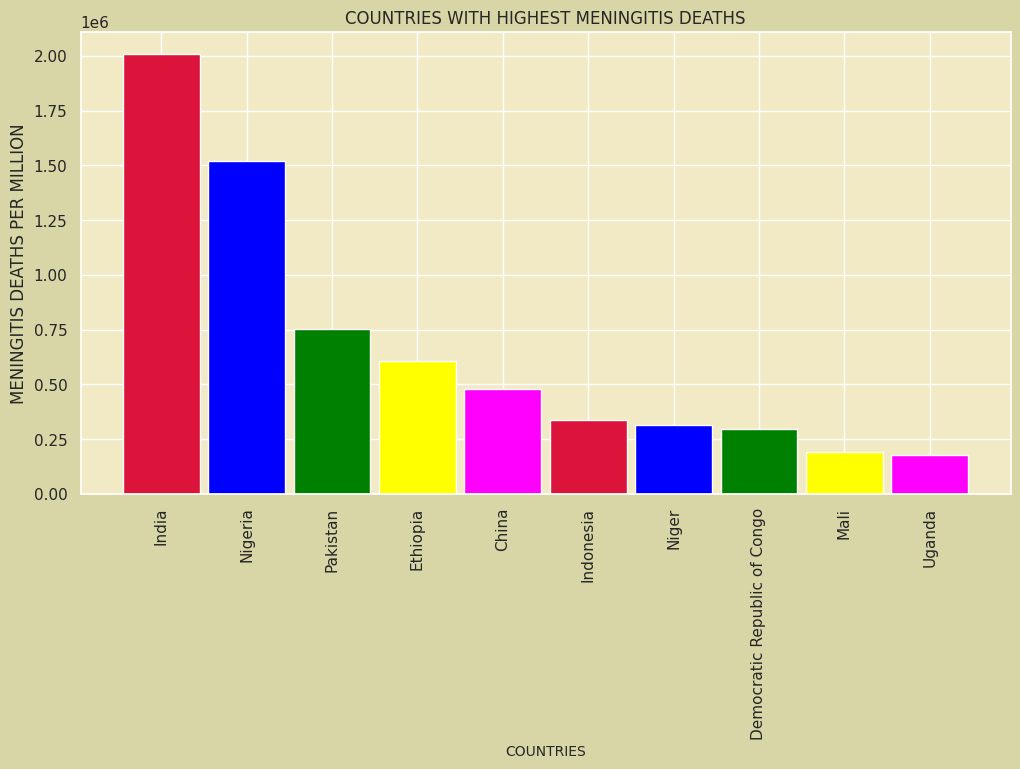

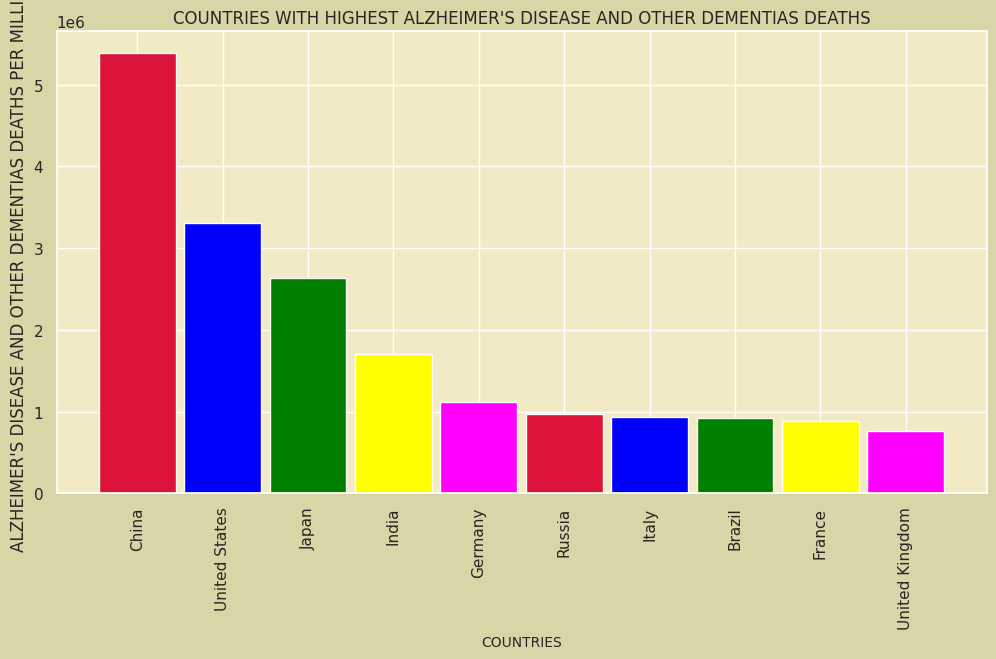

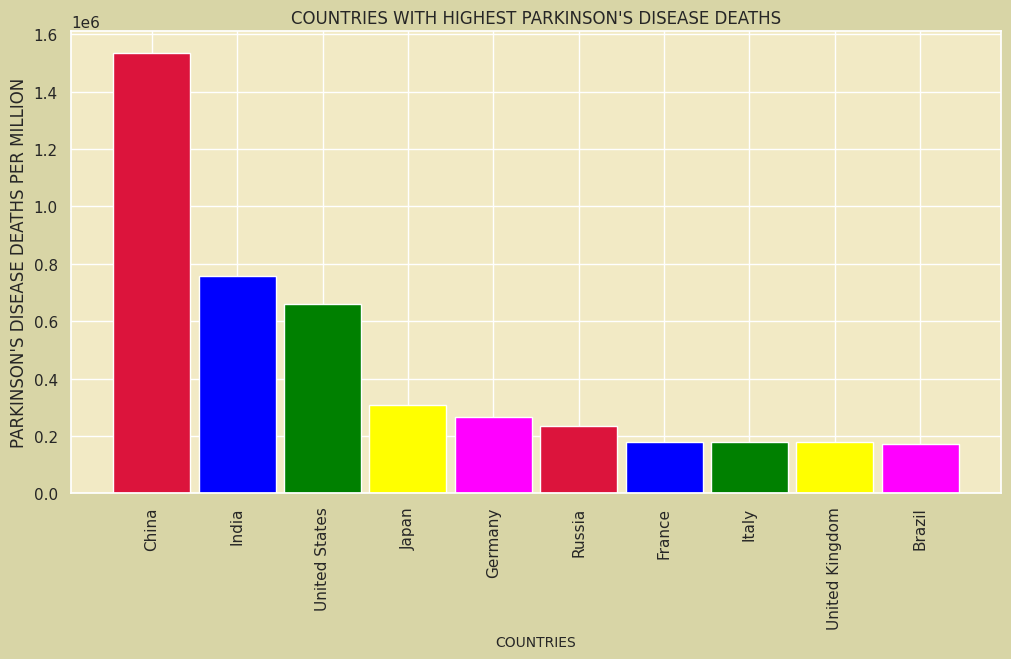

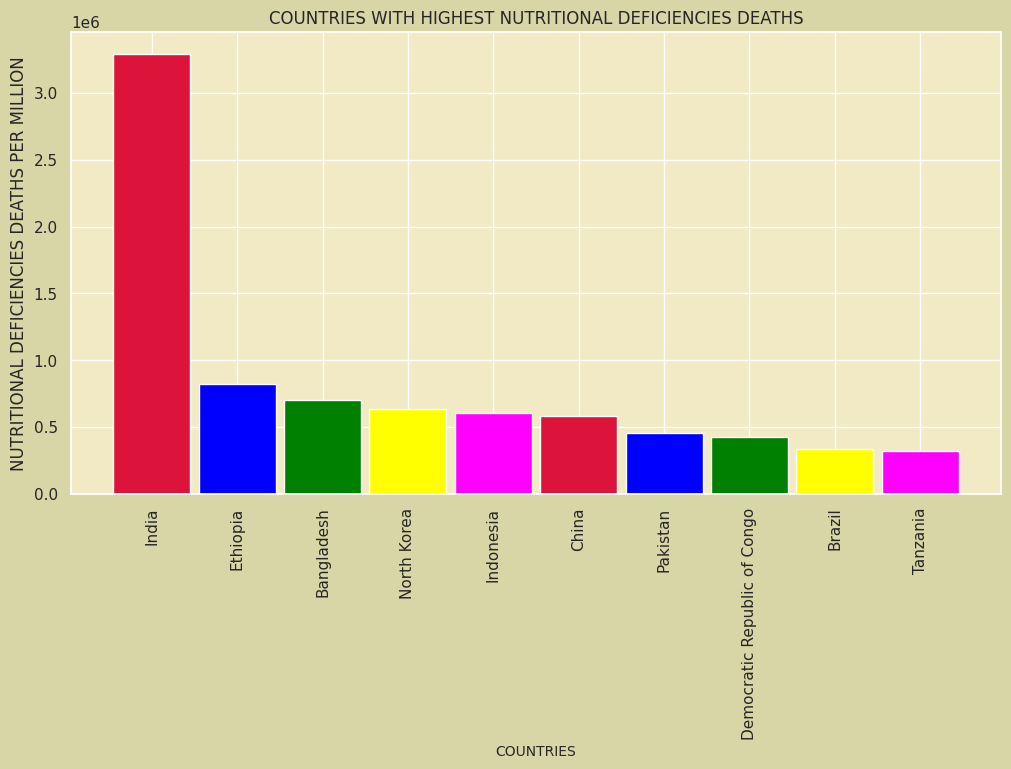

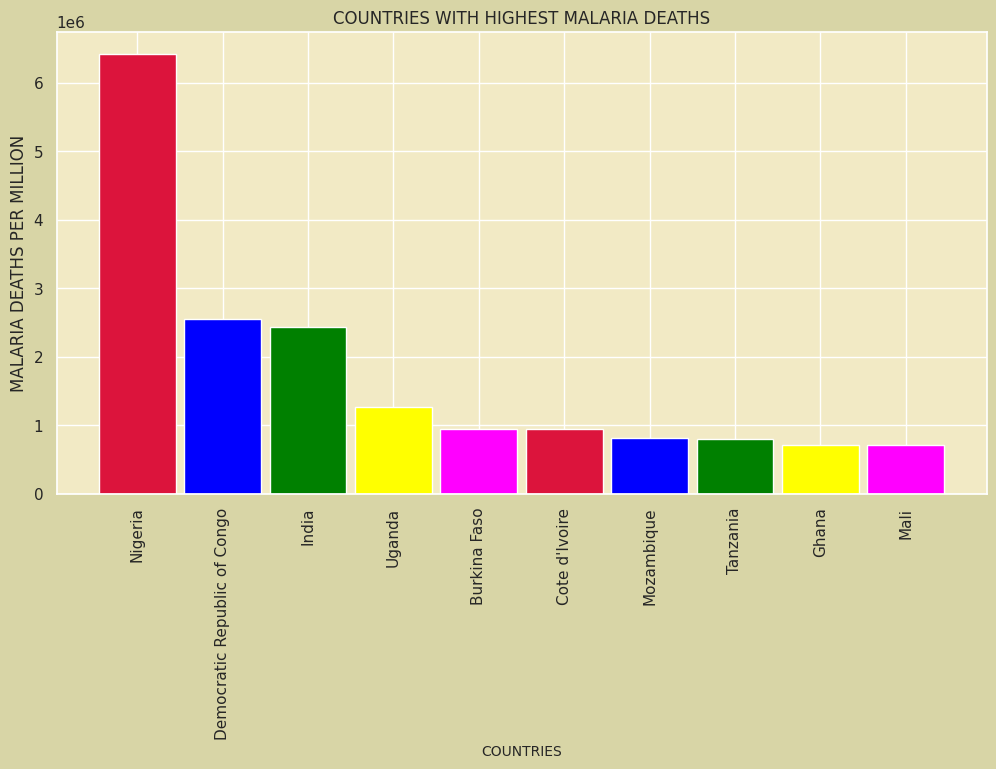

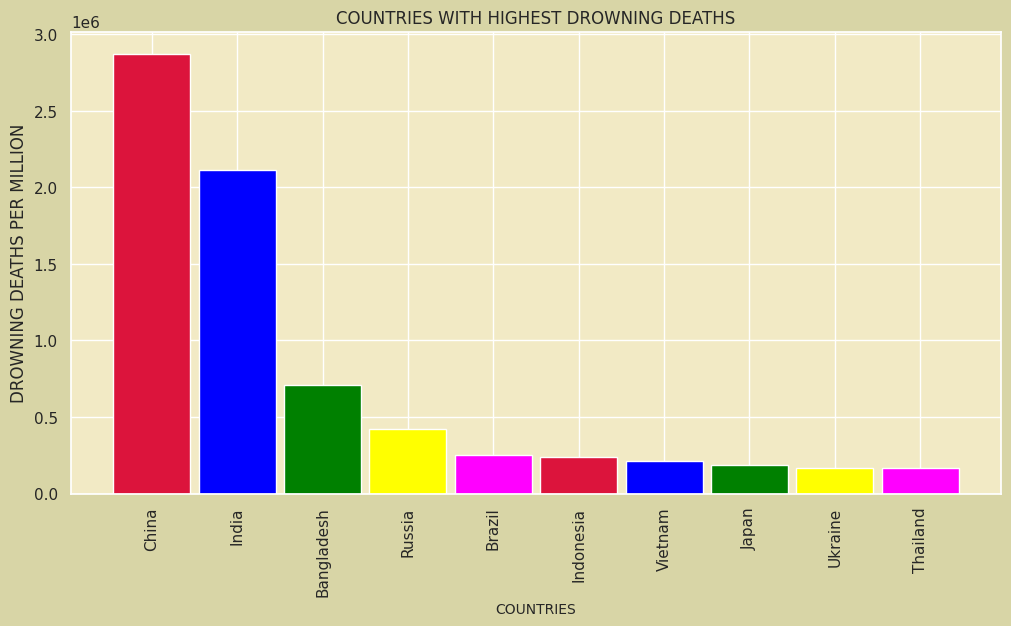

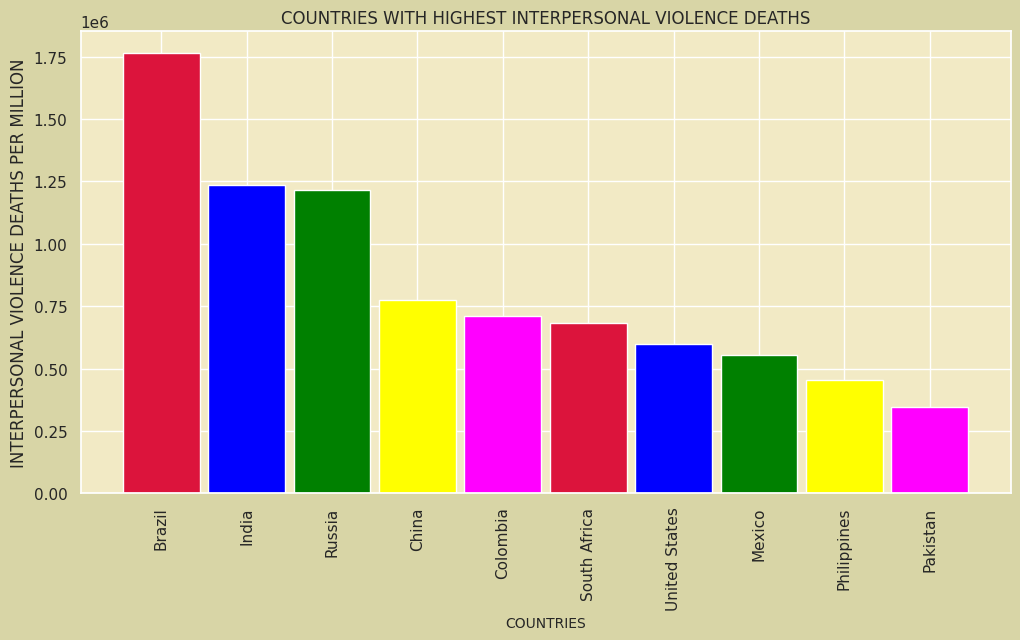

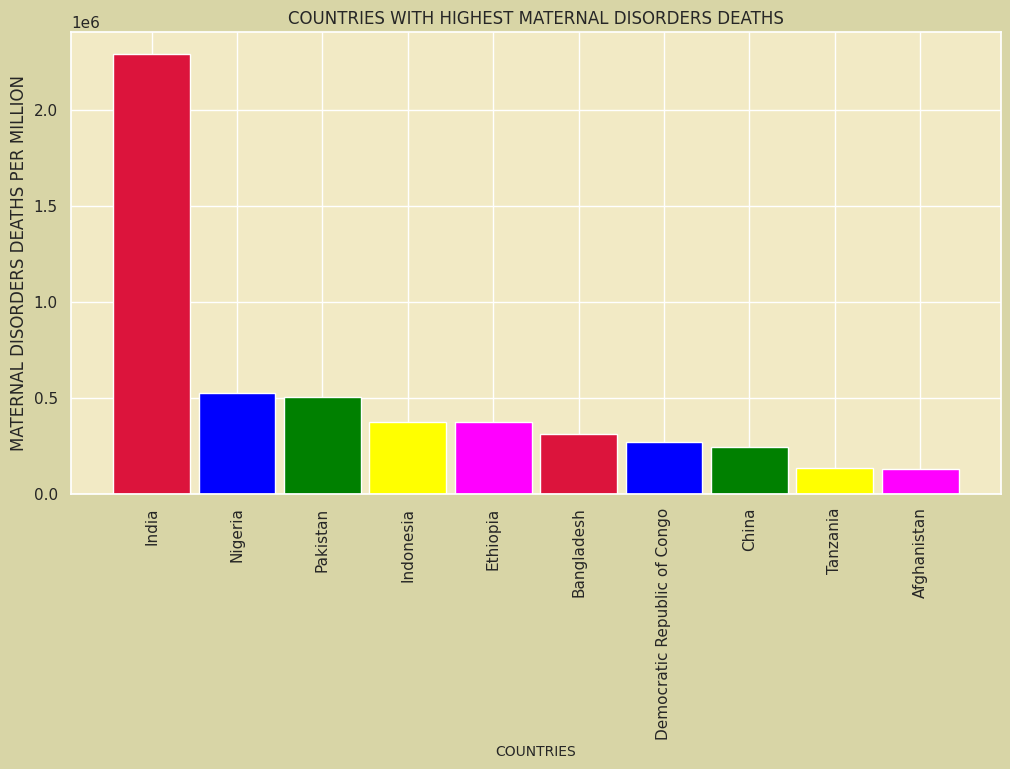

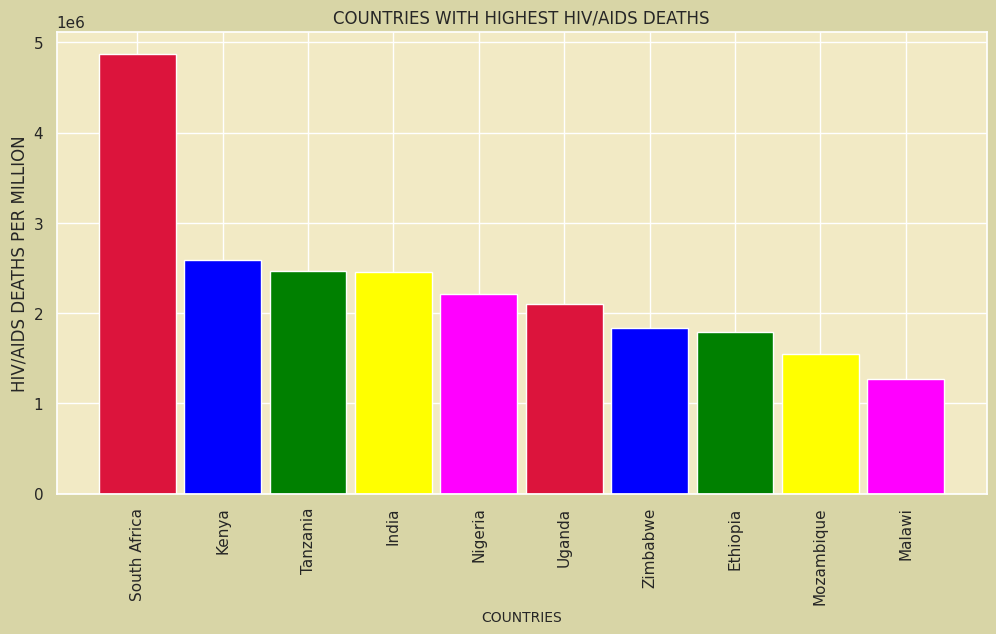

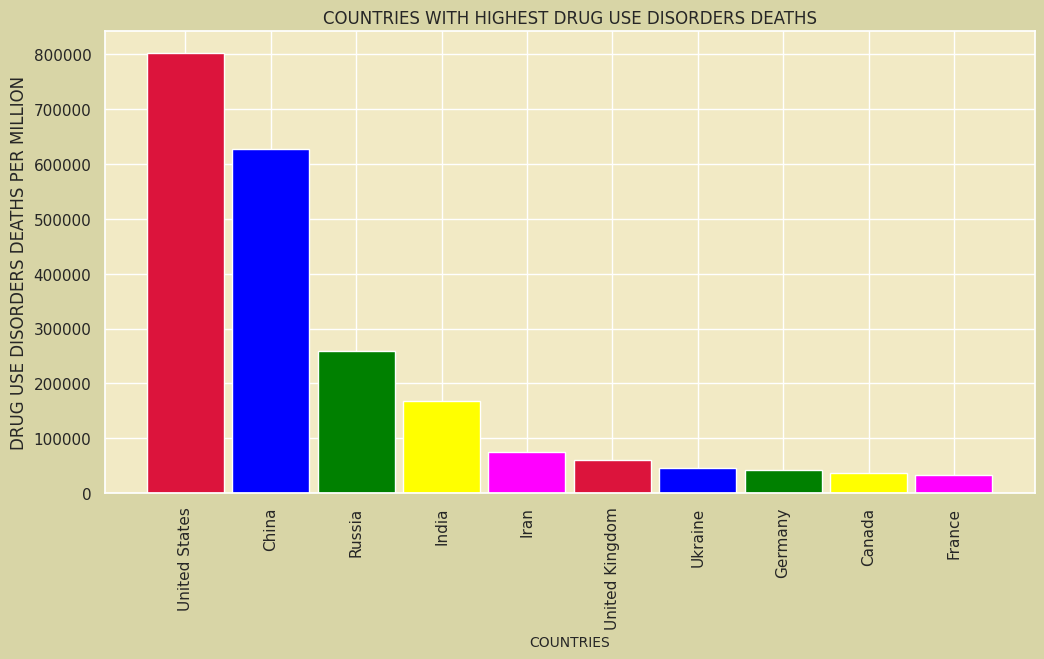

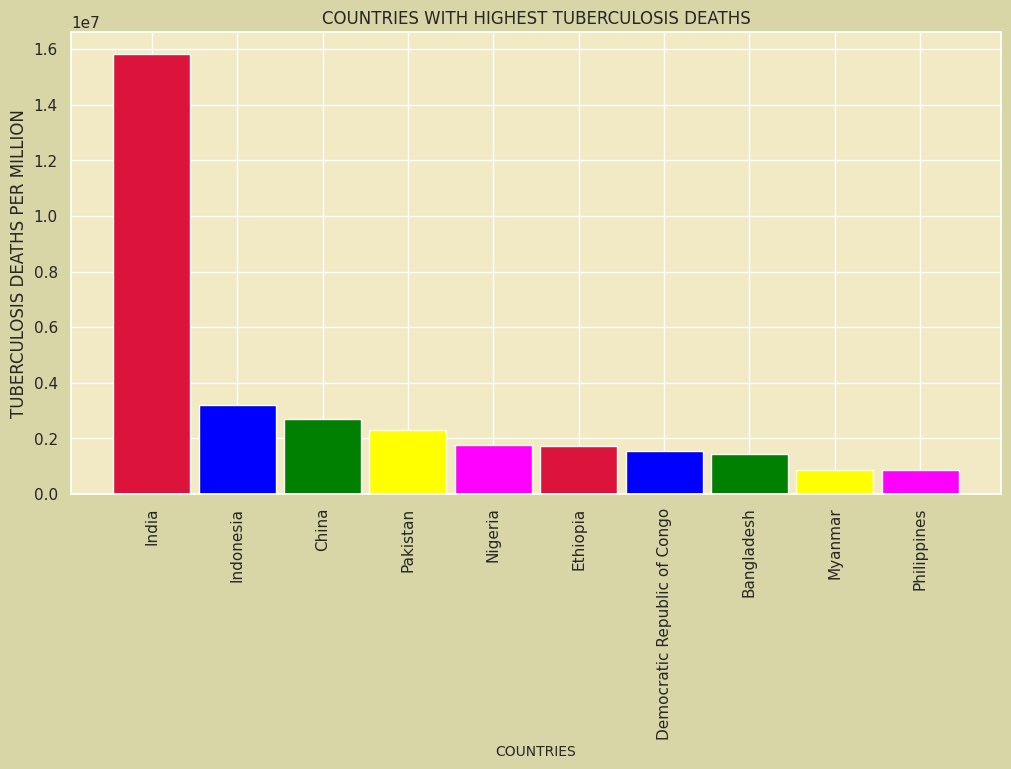

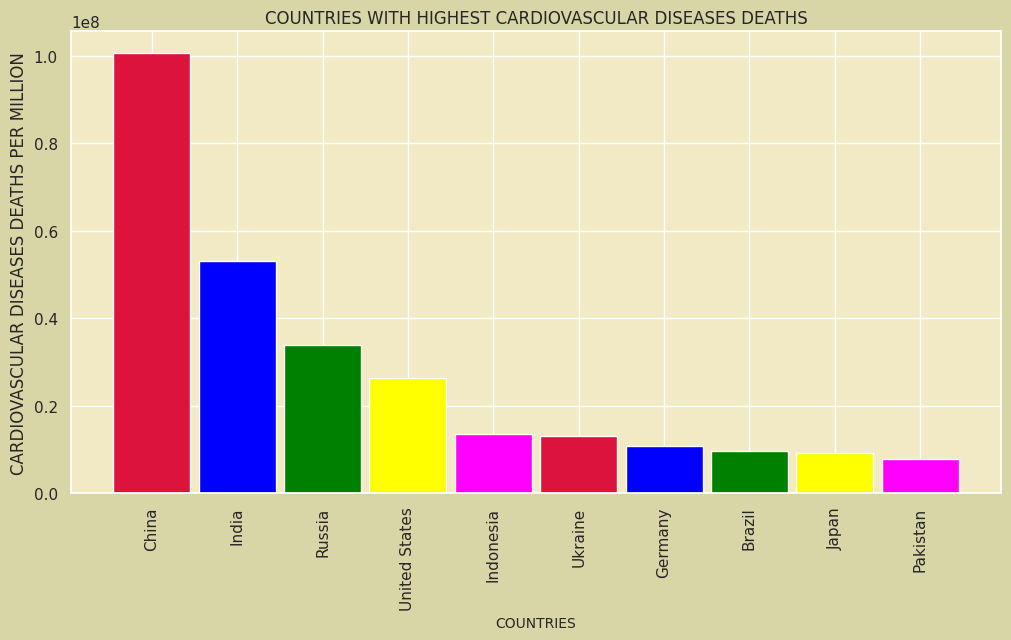

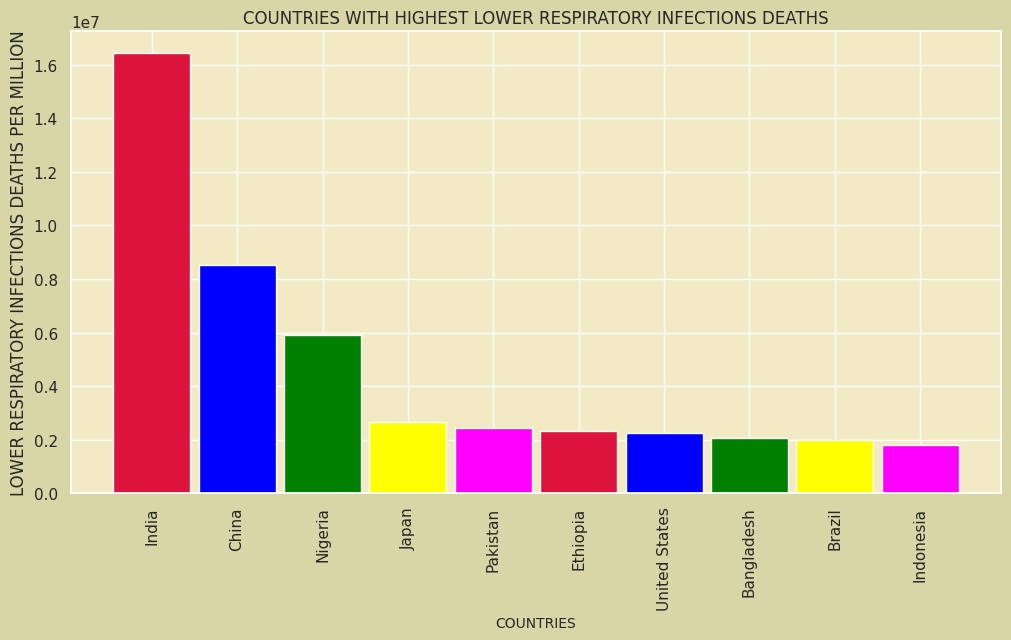

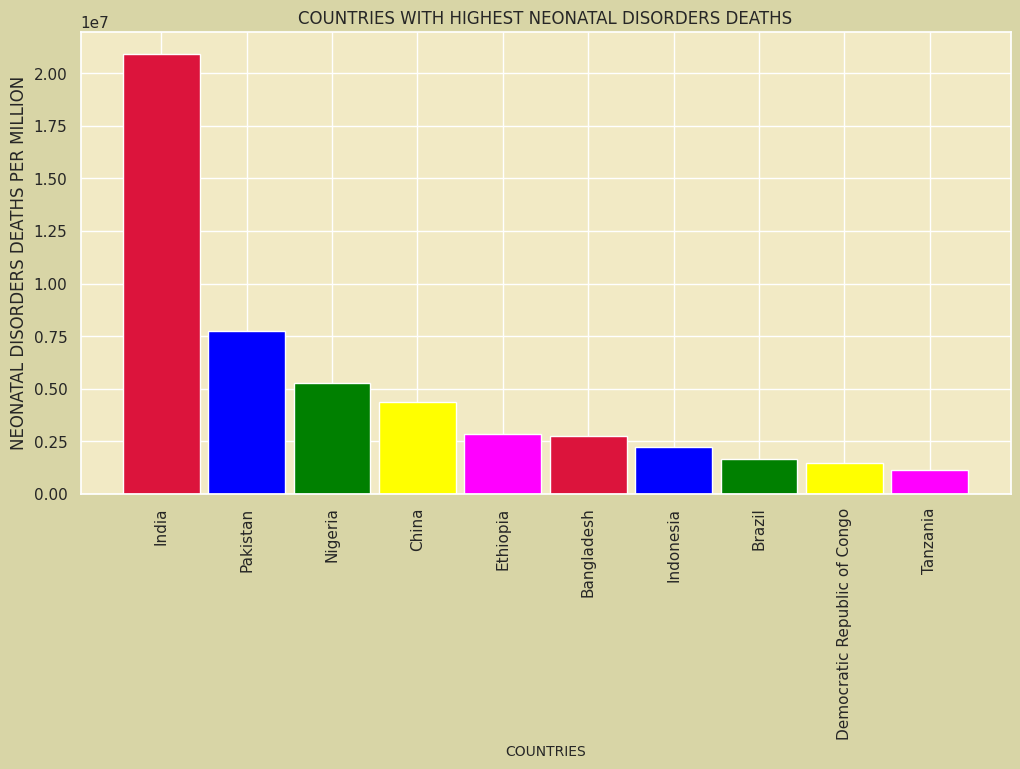

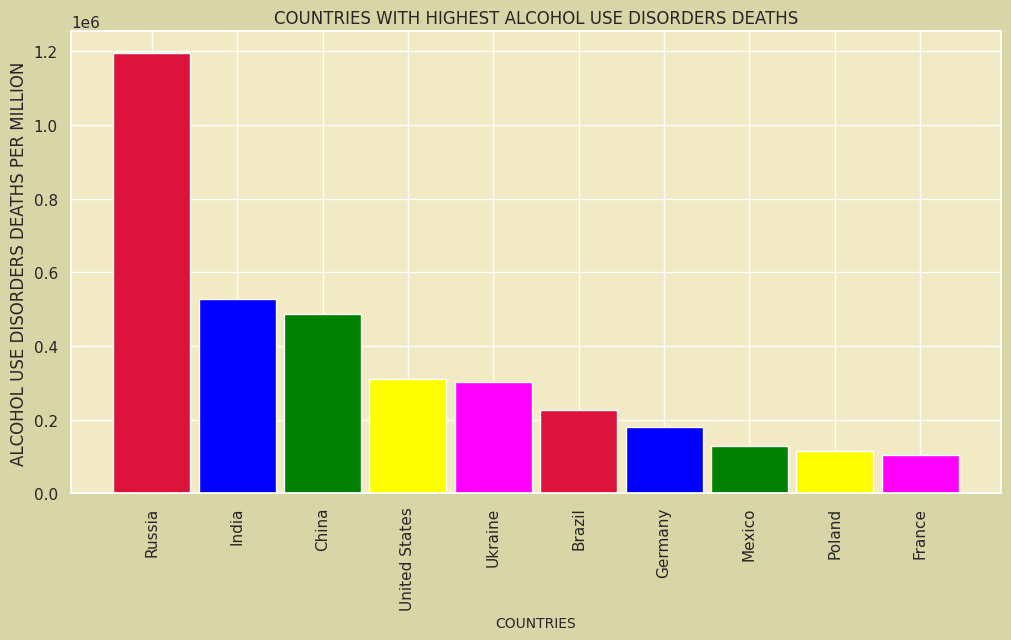

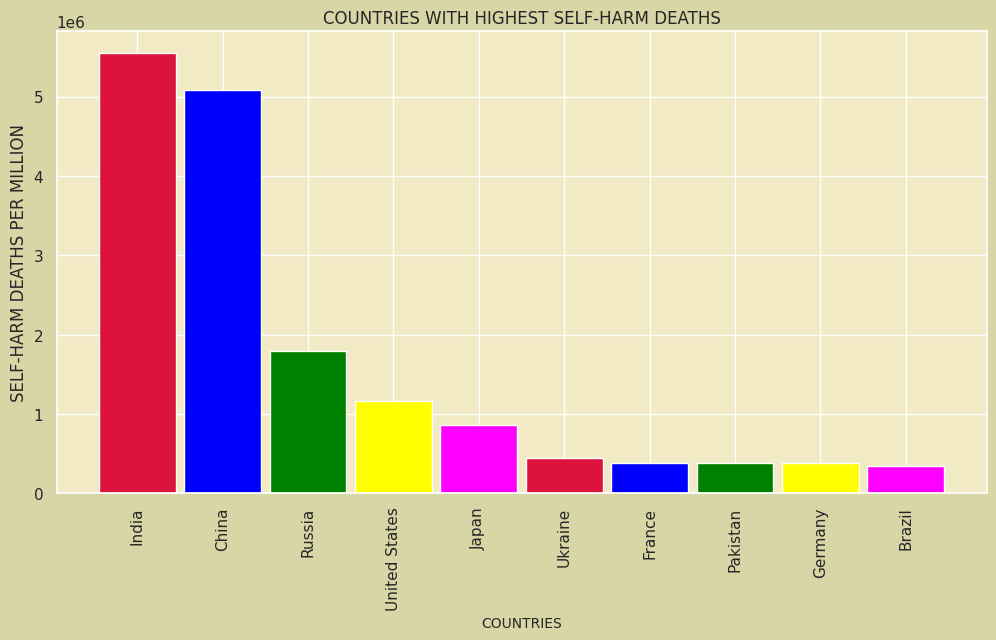

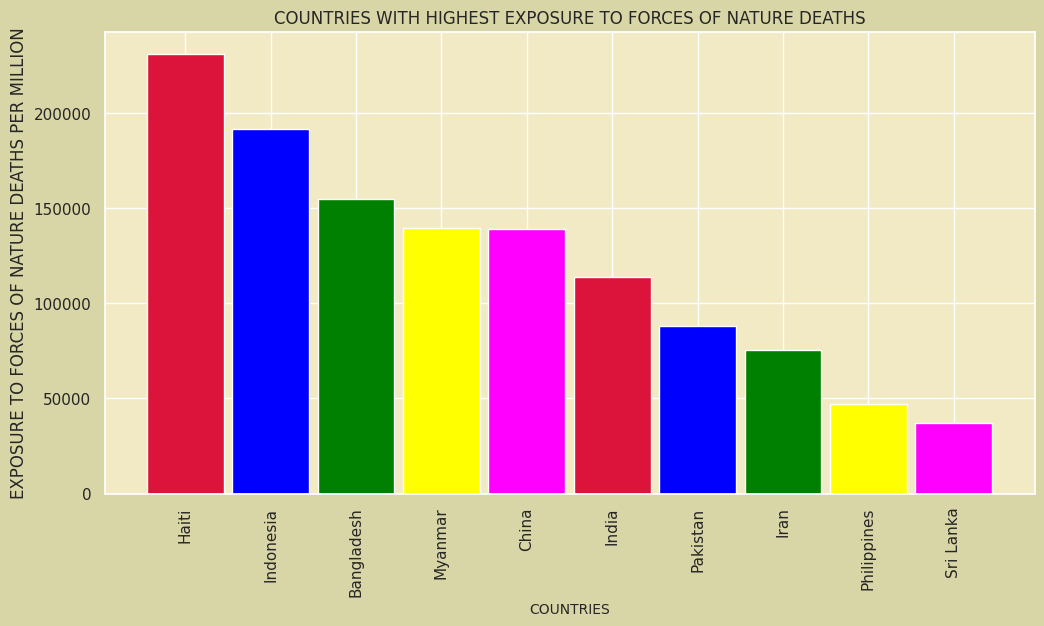

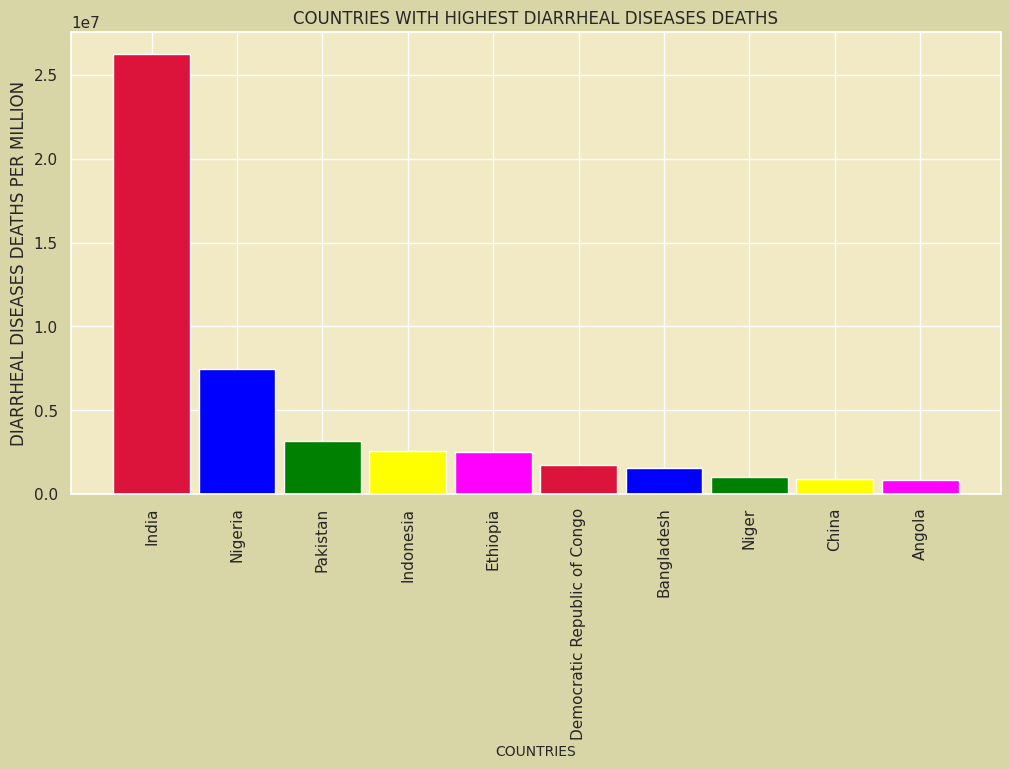

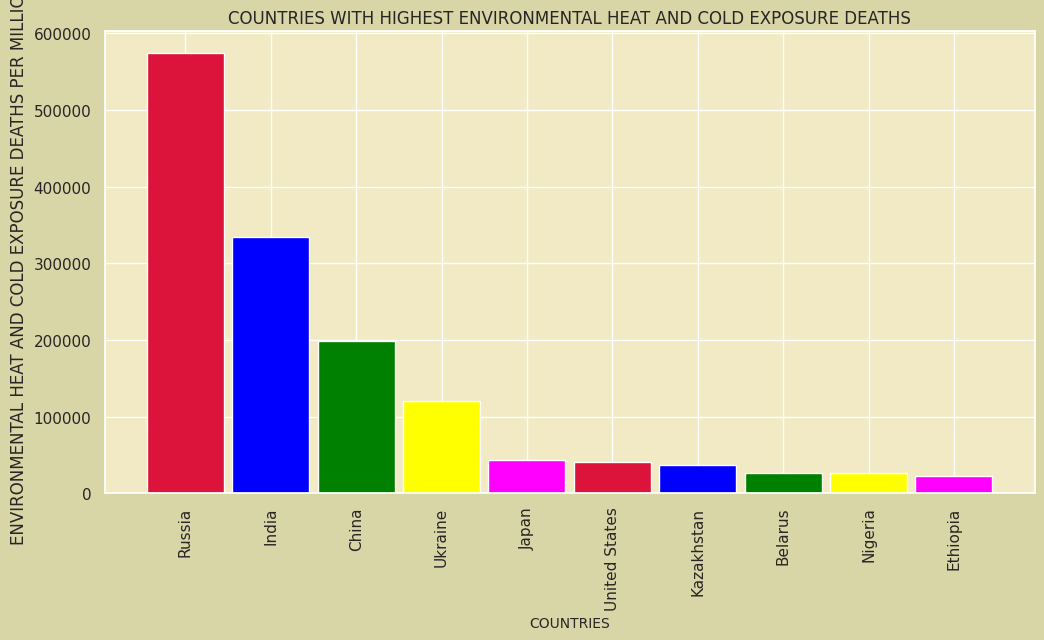

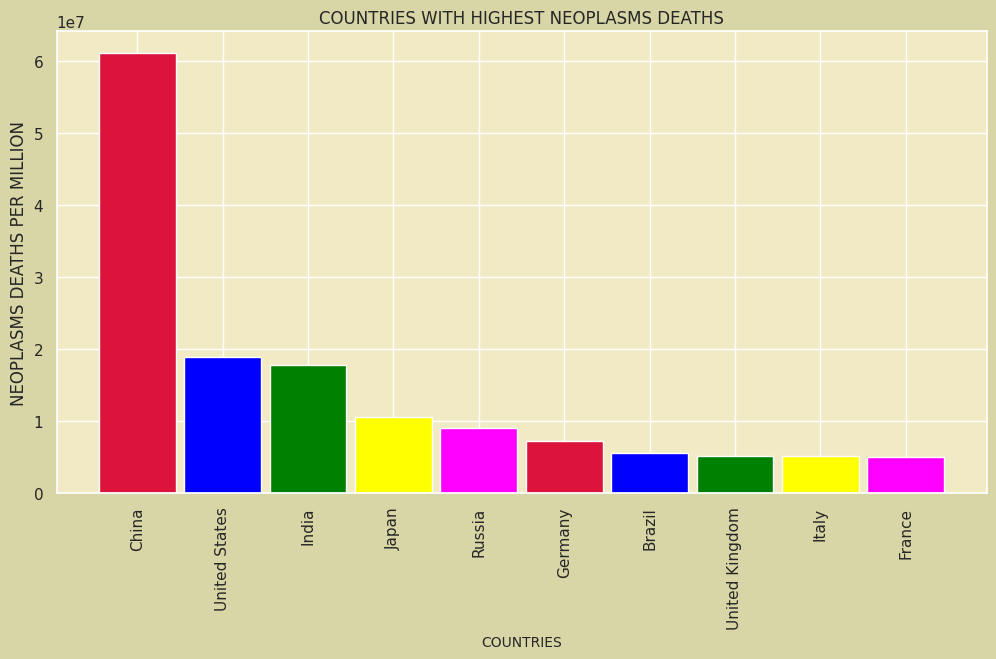

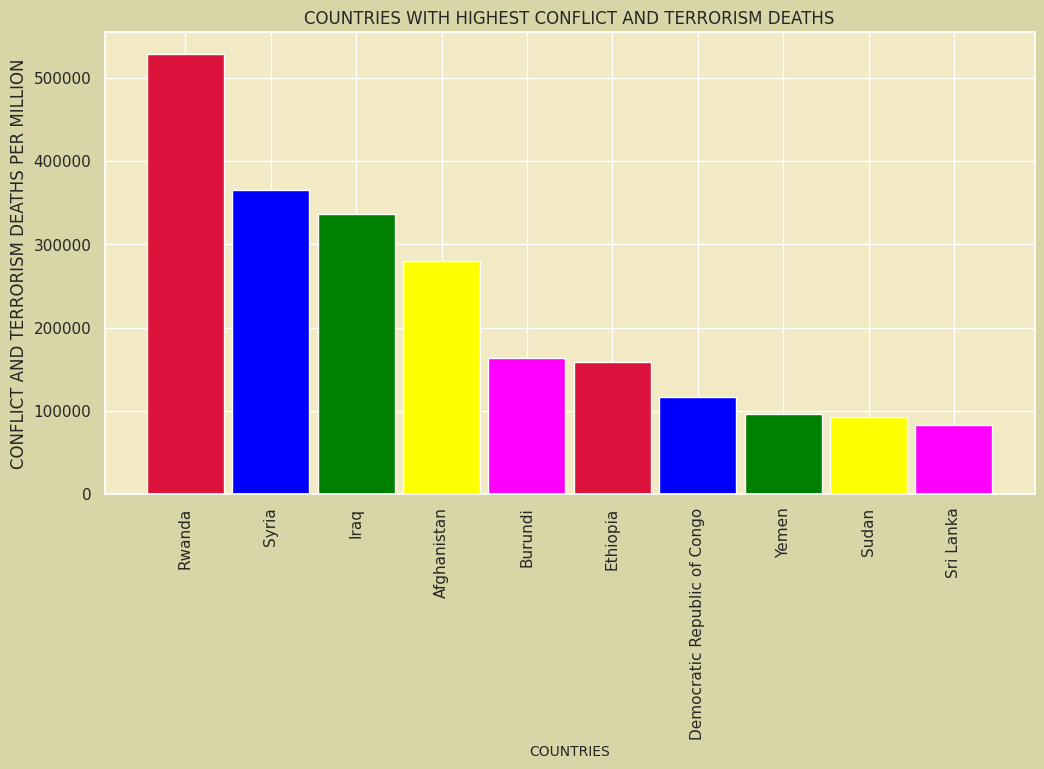

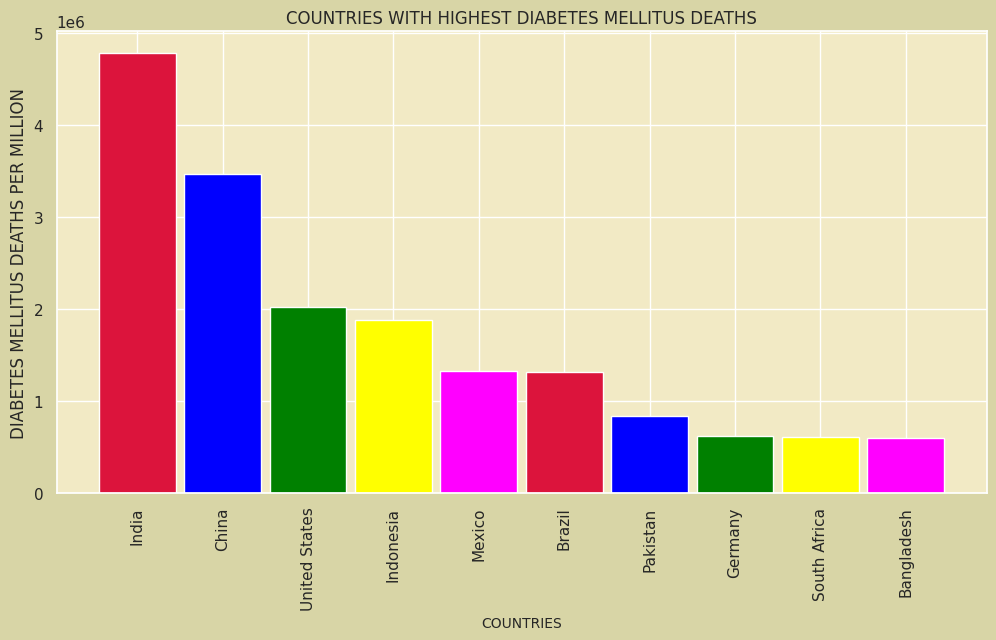

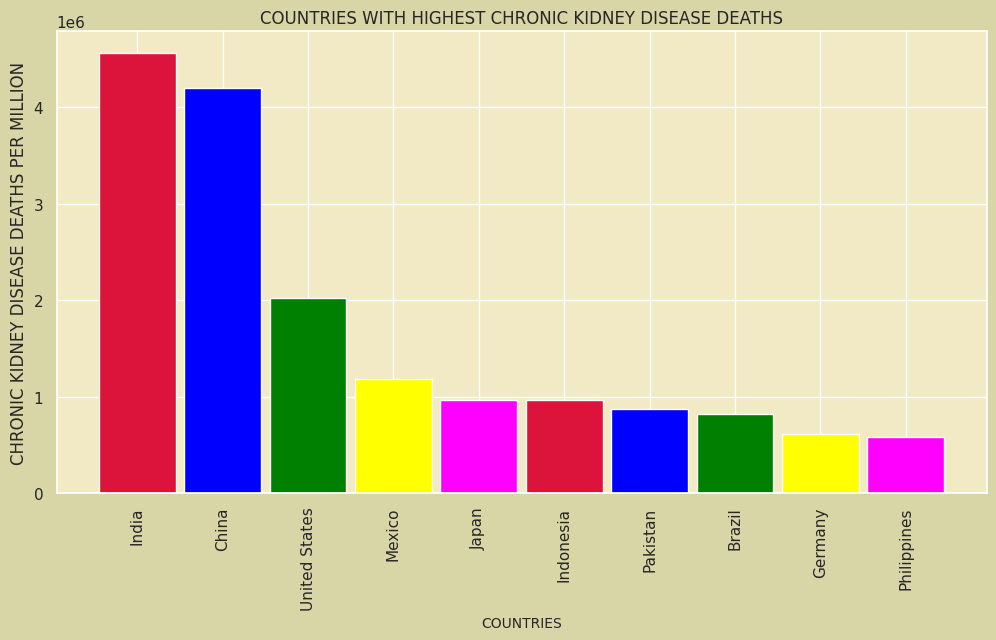

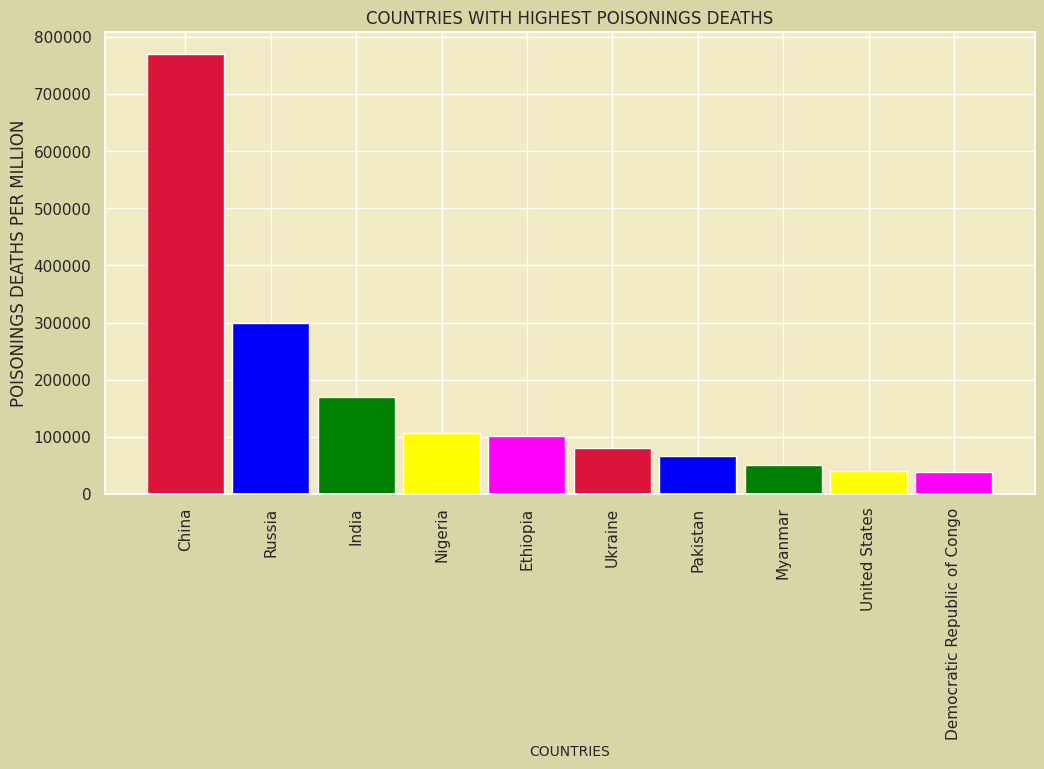

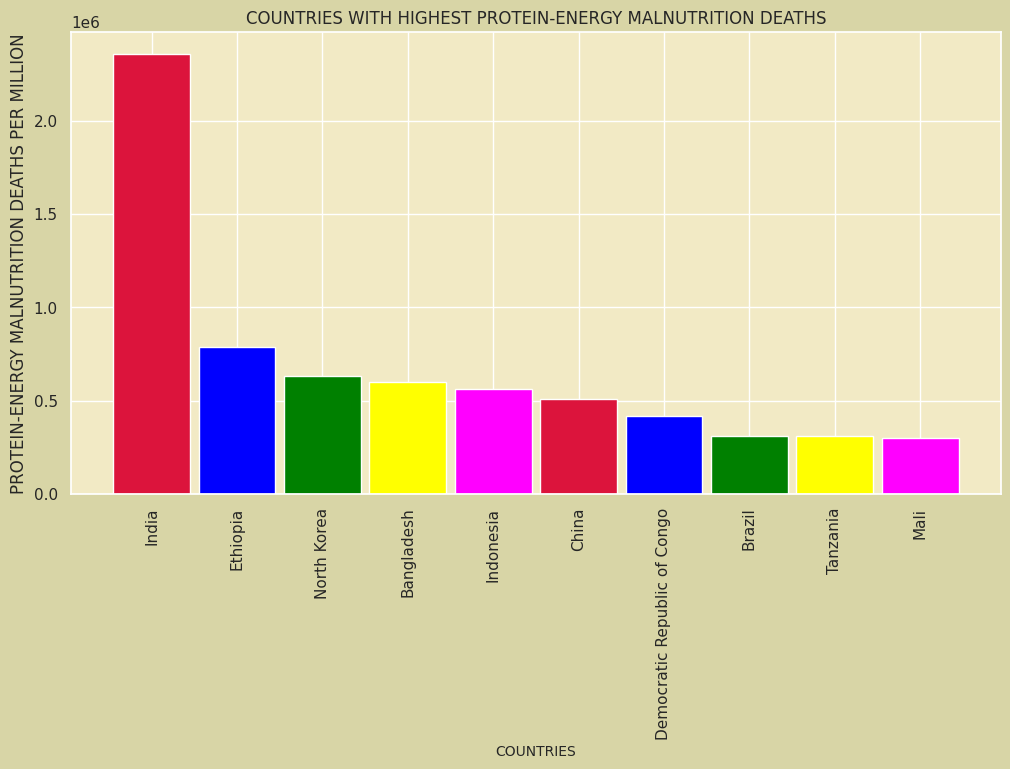

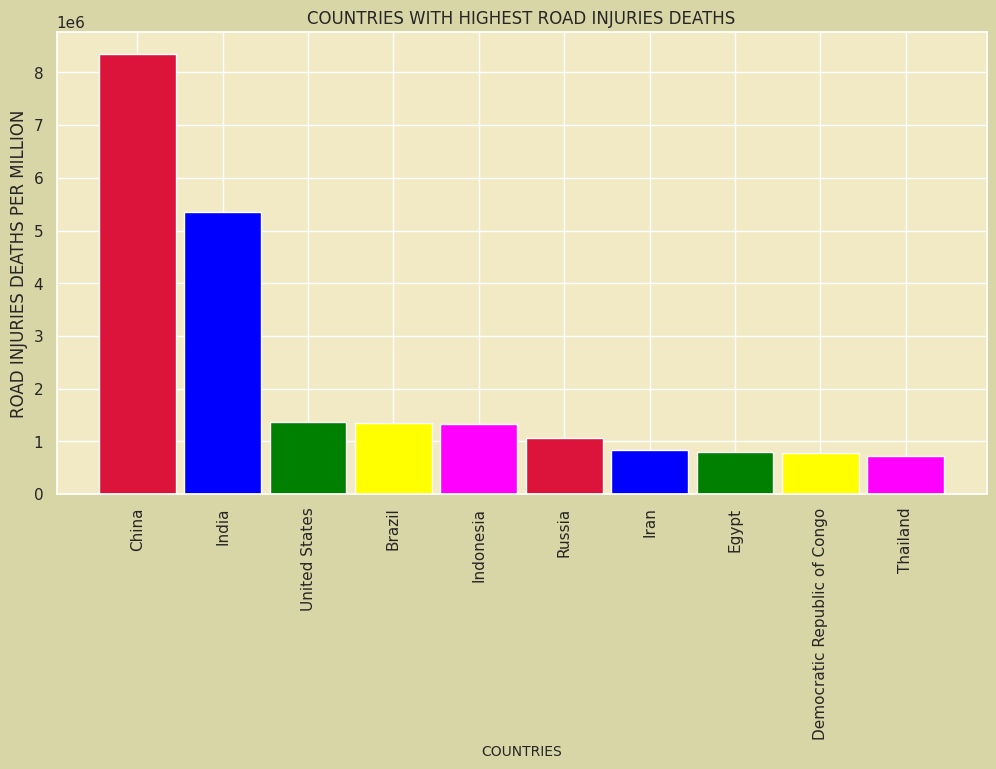

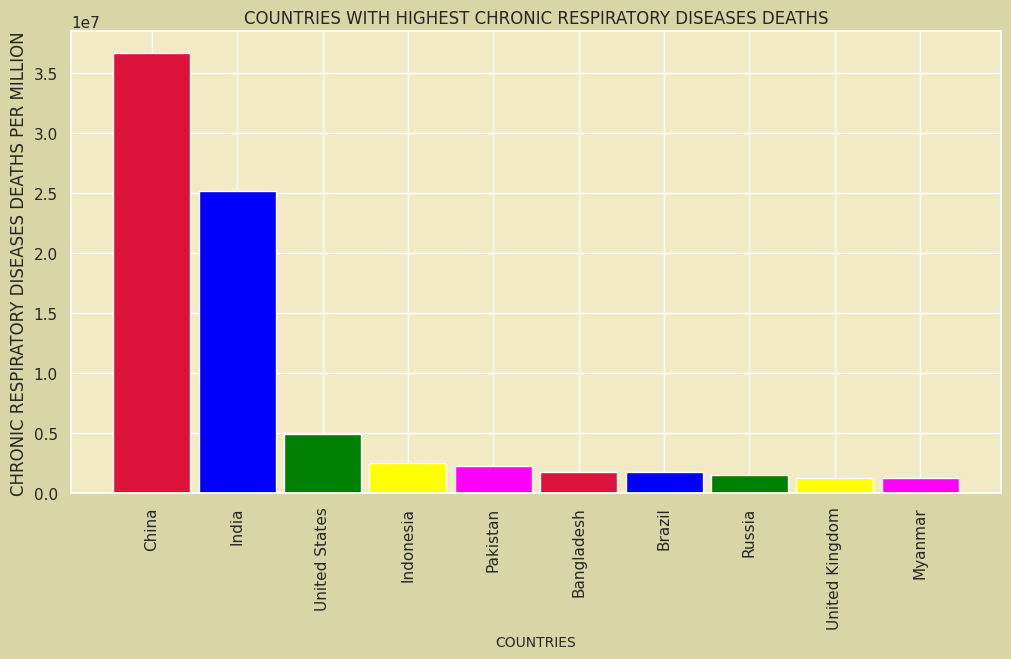

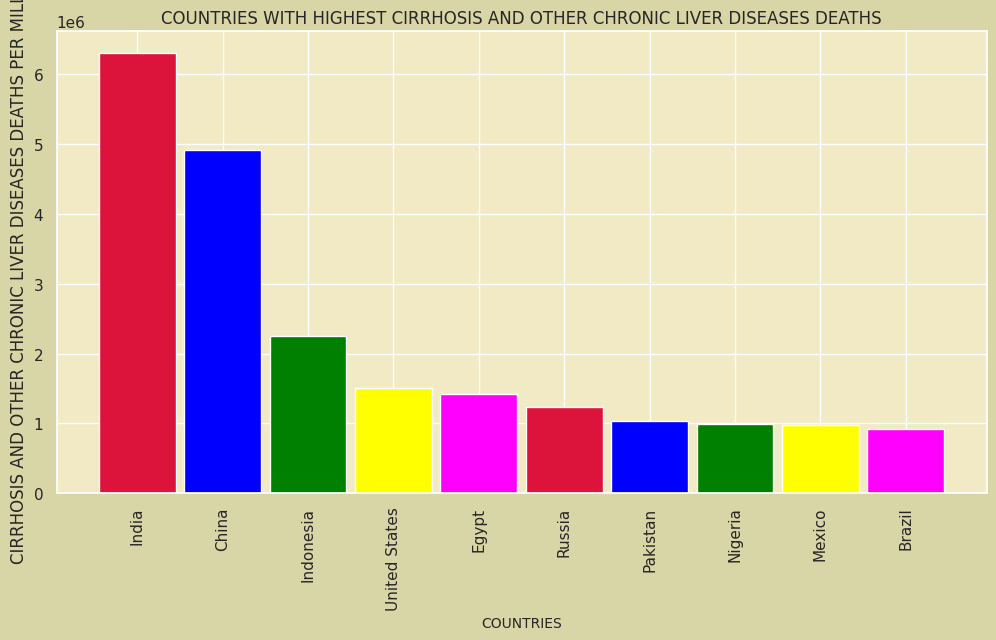

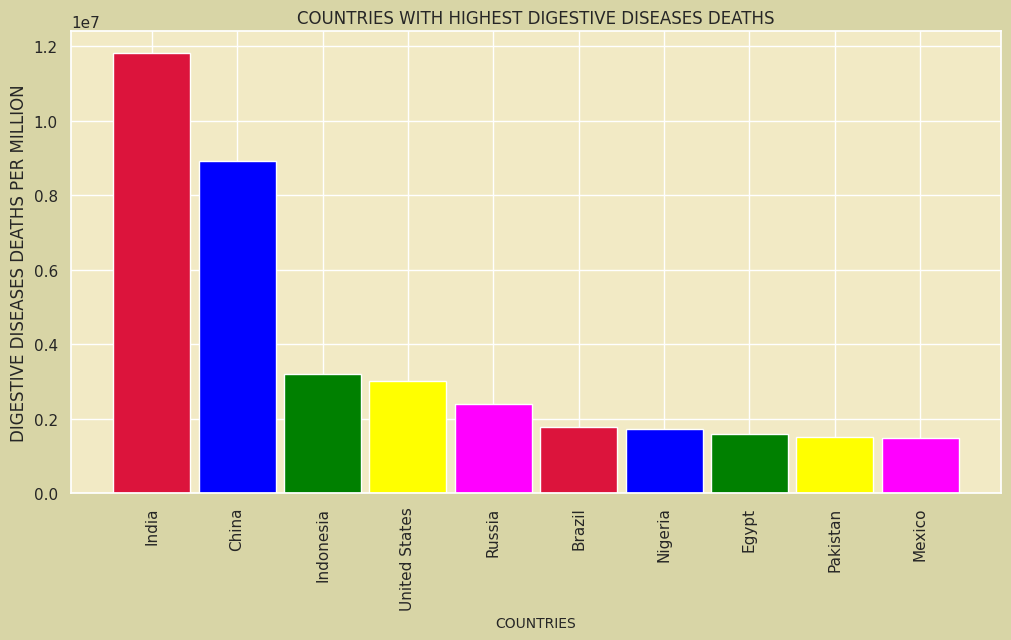

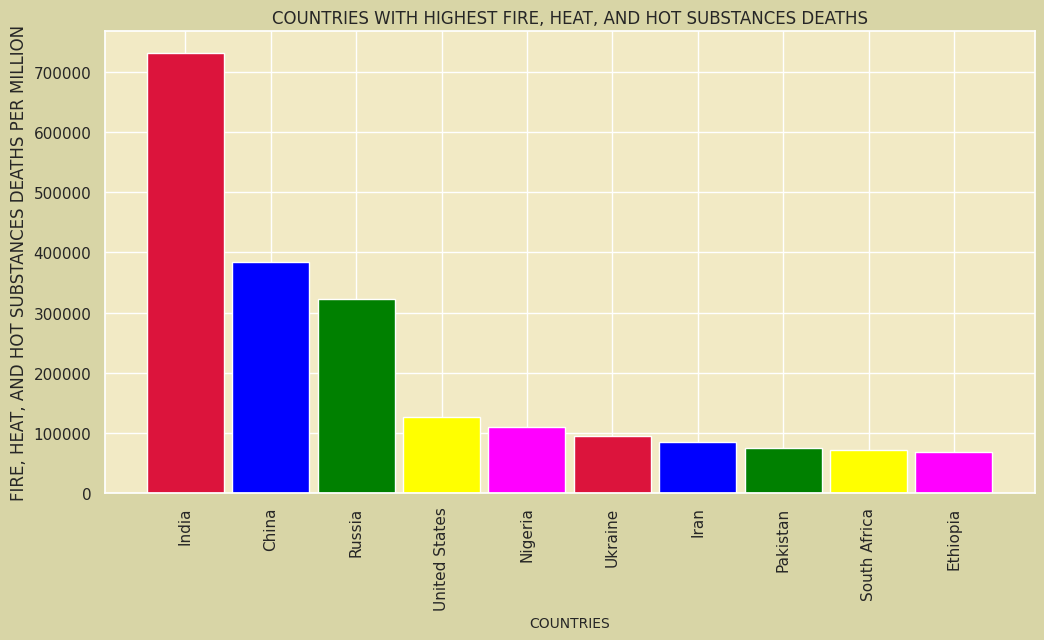

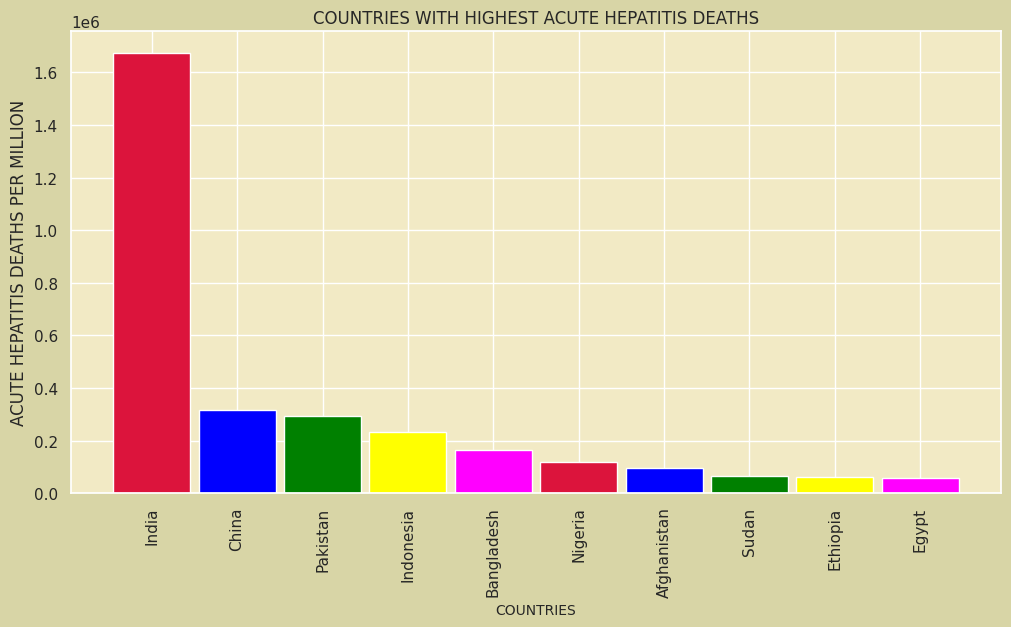

In [ ]:
# DISEASE SPECIFIC COUNTRY MORTALITY FOR 30 YEARS

diseases = [ 'Meningitis',
       'Alzheimer\'s Disease and Other Dementias', 'Parkinson\'s Disease',
       'Nutritional Deficiencies', 'Malaria', 'Drowning',
       'Interpersonal Violence', 'Maternal Disorders', 'HIV/AIDS',
       'Drug Use Disorders', 'Tuberculosis', 'Cardiovascular Diseases',
       'Lower Respiratory Infections', 'Neonatal Disorders',
       'Alcohol Use Disorders', 'Self-harm', 'Exposure to Forces of Nature',
       'Diarrheal Diseases', 'Environmental Heat and Cold Exposure',
       'Neoplasms', 'Conflict and Terrorism', 'Diabetes Mellitus',
       'Chronic Kidney Disease', 'Poisonings', 'Protein-Energy Malnutrition',
       'Road Injuries', 'Chronic Respiratory Diseases',
       'Cirrhosis and Other Chronic Liver Diseases', 'Digestive Diseases',
       'Fire, Heat, and Hot Substances', 'Acute Hepatitis']
  
for x in diseases:
    if df[x].dtypes != 'string':
        #print(x)
        data = df.groupby(['Country'])[x].sum().sort_values(ascending =False)[:10]
        plt.figure(figsize=(12,6))
        plt.bar(data=data ,x = data.index , height = data.values, width=0.9, color = ['crimson','blue','green', 'yellow', 'magenta'])
        plt.xticks(rotation='vertical')
        plt.xlabel("COUNTRIES" , size = 10)
        plt.ylabel(x.upper()+' DEATHS PER MILLION')
        plt.title("COUNTRIES WITH HIGHEST "+x.upper()+' DEATHS')

In [ ]:
from sklearn.model_selection import train_test_split
X = df[['Meningitis',
       'Alzheimer\'s Disease and Other Dementias', 'Parkinson\'s Disease',
       'Nutritional Deficiencies', 'Malaria', 
        'Maternal Disorders', 'HIV/AIDS',
       'Drug Use Disorders', 'Tuberculosis', 'Cardiovascular Diseases',
       'Lower Respiratory Infections', 'Neonatal Disorders',
       'Alcohol Use Disorders',  
       'Diarrheal Diseases', 
       'Neoplasms', 'Diabetes Mellitus',
       'Chronic Kidney Disease', 'Poisonings', 'Protein-Energy Malnutrition',
        'Chronic Respiratory Diseases',
       'Cirrhosis and Other Chronic Liver Diseases', 'Digestive Diseases',
        'Acute Hepatitis']] # Independet variable
y = df['Total_deaths'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

In [ ]:
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train) #training the model

# sklearn regression module
y_pred = model.predict(X_test)

#Evaluvation: MSE
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_pred, y_test)

# R_square
R_square = model.score(X_test,y_test)
print('The Mean Square Error(MSE) or J(theta) is: ',mse)
print('R square obtain for scikit learn library is :',R_square)

The Mean Square Error(MSE) or J(theta) is:  91805251.11677837
R square obtain for scikit learn library is : 0.9998795794593277
